[1) Missing Value](#1)

 <a id ="1"> Missing Value </a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/kc_house_data.csv")
import warnings 
warnings.filterwarnings('ignore')

df["date"] =df["date"].str.split("/")
df["date"] =df["date"].apply(lambda x: x[2]).astype(int)
#df = df.iloc[:,2:]
df

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  2014  221900.0         3       1.00         1180      5650   
1      6414100192  2014  538000.0         3       2.25         2570      7242   
2      5631500400  2015  180000.0         2       1.00          770     10000   
3      2487200875  2014  604000.0         4       3.00         1960      5000   
4      1954400510  2015  510000.0         3       2.00         1680      8080   
...           ...   ...       ...       ...        ...          ...       ...   
21592   263000018  2014  360000.0         3       2.50         1530      1131   
21593  6600060120  2015  400000.0         4       2.50         2310      5813   
21594  1523300141  2014  402101.0         2       0.75         1020      1350   
21595   291310100  2015  400000.0         3       2.50         1600      2388   
21596  1523300157  2014  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0         1.0         NaN   0.0  ...      7        1180            0.0   
1         2.0         0.0   0.0  ...      7        2170          400.0   
2         1.0         0.0   0.0  ...      6         770            0.0   
3         1.0         0.0   0.0  ...      7        1050          910.0   
4         1.0         0.0   0.0  ...      8        1680            0.0   
...       ...         ...   ...  ...    ...         ...            ...   
21592     3.0         0.0   0.0  ...      8        1530            0.0   
21593     2.0         0.0   0.0  ...      8        2310            0.0   
21594     2.0         0.0   0.0  ...      7        1020            0.0   
21595     2.0         NaN   0.0  ...      8        1600            0.0   
21596     2.0         0.0   0.0  ...      7        1020            0.0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0         1955           0.0    98178  47.5112 -122.257           1340   
1         1951        1991.0    98125  47.7210 -122.319           1690   
2         1933           NaN    98028  47.7379 -122.233           2720   
3         1965           0.0    98136  47.5208 -122.393           1360   
4         1987           0.0    98074  47.6168 -122.045           1800   
...        ...           ...      ...      ...      ...            ...   
21592     2009           0.0    98103  47.6993 -122.346           1530   
21593     2014           0.0    98146  47.5107 -122.362           1830   
21594     2009           0.0    98144  47.5944 -122.299           1020   
21595     2004           0.0    98027  47.5345 -122.069           1410   
21596     2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 21 columns]

In [41]:
df.describe()

id          date         price      bedrooms     bathrooms  \
count  2.159700e+04  21597.000000  2.159700e+04  21597.000000  21597.000000   
mean   4.580474e+09   2014.322962  5.402966e+05      3.373200      2.115826   
std    2.876736e+09      0.467619  3.673681e+05      0.926299      0.768984   
min    1.000102e+06   2014.000000  7.800000e+04      1.000000      0.500000   
25%    2.123049e+09   2014.000000  3.220000e+05      3.000000      1.750000   
50%    3.904930e+09   2014.000000  4.500000e+05      3.000000      2.250000   
75%    7.308900e+09   2015.000000  6.450000e+05      4.000000      2.500000   
max    9.900000e+09   2015.000000  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21597.000000  2.159700e+04  21597.000000  19221.000000  21534.000000   
mean    2080.321850  1.509941e+04      1.494096      0.007596      0.233863   
std      918.106125  4.141264e+04      0.539683      0.086825      0.765686   
min      370.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1430.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068500e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

          condition         grade    sqft_above      yr_built  yr_renovated  \
count  21597.000000  21597.000000  21597.000000  21597.000000  17755.000000   
mean       3.409825      7.657915   1788.596842   1970.999676     83.636778   
std        0.650546      1.173200    827.759761     29.375234    399.946414   
min        1.000000      3.000000    370.000000   1900.000000      0.000000   
25%        3.000000      7.000000   1190.000000   1951.000000      0.000000   
50%        3.000000      7.000000   1560.000000   1975.000000      0.000000   
75%        4.000000      8.000000   2210.000000   1997.000000      0.000000   
max        5.000000     13.000000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  int64  
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Missing Value

In [43]:
# drop column 
df = df.iloc[:,1:]
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      2014  221900.0         3       1.00         1180      5650     1.0   
1      2014  538000.0         3       2.25         2570      7242     2.0   
2      2015  180000.0         2       1.00          770     10000     1.0   
3      2014  604000.0         4       3.00         1960      5000     1.0   
4      2015  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21592  2014  360000.0         3       2.50         1530      1131     3.0   
21593  2015  400000.0         4       2.50         2310      5813     2.0   
21594  2014  402101.0         2       0.75         1020      1350     2.0   
21595  2015  400000.0         3       2.50         1600      2388     2.0   
21596  2014  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0             NaN   0.0          3      7        1180           0.0      1955   
1             0.0   0.0          3      7        2170         400.0      1951   
2             0.0   0.0          3      6         770           0.0      1933   
3             0.0   0.0          5      7        1050         910.0      1965   
4             0.0   0.0          3      8        1680           0.0      1987   
...           ...   ...        ...    ...         ...           ...       ...   
21592         0.0   0.0          3      8        1530           0.0      2009   
21593         0.0   0.0          3      8        2310           0.0      2014   
21594         0.0   0.0          3      7        1020           0.0      2009   
21595         NaN   0.0          3      8        1600           0.0      2004   
21596         0.0   0.0          3      7        1020           0.0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0               0.0    98178  47.5112 -122.257           1340        5650  
1            1991.0    98125  47.7210 -122.319           1690        7639  
2               NaN    98028  47.7379 -122.233           2720        8062  
3               0.0    98136  47.5208 -122.393           1360        5000  
4               0.0    98074  47.6168 -122.045           1800        7503  
...             ...      ...      ...      ...            ...         ...  
21592           0.0    98103  47.6993 -122.346           1530        1509  
21593           0.0    98146  47.5107 -122.362           1830        7200  
21594           0.0    98144  47.5944 -122.299           1020        2007  
21595           0.0    98027  47.5345 -122.069           1410        1287  
21596           0.0    98144  47.5941 -122.299           1020        1357  

[21597 rows x 20 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [45]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [47]:
df.nunique()

date                2
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     304
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [48]:
df[df["sqft_basement"] == '?']

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6      2014   257500.0         3       2.25         1715      6819     2.0   
18     2014   189000.0         2       1.00         1200      9850     1.0   
42     2014   861990.0         5       2.75         3595      5639     2.0   
79     2015   720000.0         4       2.50         3450     39683     2.0   
112    2014   272500.0         3       1.75         1540     12600     1.0   
...     ...        ...       ...        ...          ...       ...     ...   
21442  2014   504600.0         5       3.00         2360      5000     1.0   
21447  2014   337500.0         4       2.50         2330      4907     2.0   
21473  2015   352500.0         2       2.50          980      1010     3.0   
21519  2014   332000.0         4       2.50         2380      5737     2.0   
21581  2015  1580000.0         4       3.25         3410     10125     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
6             0.0   0.0          3      7        1715             ?      1995   
18            0.0   0.0          4      7        1200             ?      1921   
42            0.0   0.0          3      9        3595             ?      2014   
79            0.0   0.0          3     10        3450             ?      2002   
112           0.0   0.0          4      7        1160             ?      1980   
...           ...   ...        ...    ...         ...           ...       ...   
21442         0.0   0.0          3      7        1390             ?      2008   
21447         0.0   0.0          3      7        2330             ?      2013   
21473         NaN   0.0          3      8         980             ?      2008   
21519         0.0   0.0          3      7        2380             ?      2010   
21581         0.0   0.0          3     10        3410             ?      2007   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
6               0.0    98003  47.3097 -122.327           2238        6819  
18              0.0    98002  47.3089 -122.210           1060        5095  
42              0.0    98053  47.6848 -122.016           3625        5639  
79              0.0    98010  47.3420 -122.025           3350       39750  
112             0.0    98038  47.3624 -122.031           1540       11656  
...             ...      ...      ...      ...            ...         ...  
21442           0.0    98103  47.6931 -122.330           2180        5009  
21447           NaN    98042  47.3590 -122.081           2300        3836  
21473           0.0    98117  47.6844 -122.387            980        1023  
21519           0.0    98023  47.2815 -122.356           2380        5396  
21581           NaN    98040  47.5653 -122.223           2290       10125  

[454 rows x 20 columns]

In [49]:
df['yr_renovated'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: yr_renovated, Length: 21597, dtype: bool

In [50]:
#df.sqft_basement[df["sqft_basement"] =="?"]

# replace "?" values from sqft_basement
df["sqft_basement"] = df["sqft_living"]-df["sqft_above"]


#replace nan value with 0
df['view'] = df['view'].replace(np.nan, 0)

# waterfront  missing values
df["waterfront"] = df["waterfront"].replace(np.nan, 0)

df["yr_renovated"] = df["yr_renovated"].replace(np.nan, 0)


#df.isna().sum()


In [51]:
# check for duplicate data
df[df.duplicated()]

# write to code to drop the duplicates
df.drop_duplicates(inplace = True)

##check for duplicates data again

#df[df.duplicated()].sum()

In [52]:
#pd.plotting.scatter_matrix(df, alpha=0.2)
#plt.show()

# 2  Question 1: Does renovation have a noticeable effect on price?

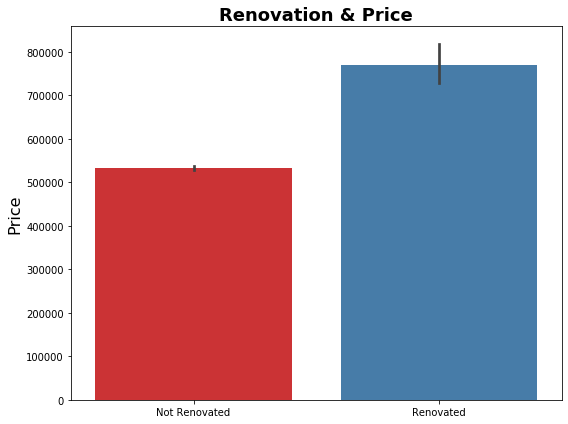

In [55]:
#Create a column with a 0 if the house has not been renovated or a 1 if the house has been renovated


fig = plt.subplots(figsize =(8,6))

df["renovated"] = np.zeros(shape = df.shape[0])
years = []
for year in df.yr_renovated:
    if year != 0:
        years.append("Renovated")
    else:
        years.append("Not Renovated")
        
df.renovated = years

sns.barplot(x = 'renovated', y = "price", data =df, palette= "Set1")

plt.title('Renovation & Price', fontweight='bold',fontsize=18)
plt.xlabel('',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.tight_layout()
plt.savefig("Renovation_Price.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")

In [56]:
df.drop("yr_renovated", axis =1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      2014  221900.0         3       1.00         1180      5650     1.0   
1      2014  538000.0         3       2.25         2570      7242     2.0   
2      2015  180000.0         2       1.00          770     10000     1.0   
3      2014  604000.0         4       3.00         1960      5000     1.0   
4      2015  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21592  2014  360000.0         3       2.50         1530      1131     3.0   
21593  2015  400000.0         4       2.50         2310      5813     2.0   
21594  2014  402101.0         2       0.75         1020      1350     2.0   
21595  2015  400000.0         3       2.50         1600      2388     2.0   
21596  2014  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0          3      7        1180              0   
1             0.0   0.0          3      7        2170            400   
2             0.0   0.0          3      6         770              0   
3             0.0   0.0          5      7        1050            910   
4             0.0   0.0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592         0.0   0.0          3      8        1530              0   
21593         0.0   0.0          3      8        2310              0   
21594         0.0   0.0          3      7        1020              0   
21595         0.0   0.0          3      8        1600              0   
21596         0.0   0.0          3      7        1020              0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          1955    98178  47.5112 -122.257           1340        5650   
1          1951    98125  47.7210 -122.319           1690        7639   
2          1933    98028  47.7379 -122.233           2720        8062   
3          1965    98136  47.5208 -122.393           1360        5000   
4          1987    98074  47.6168 -122.045           1800        7503   
...         ...      ...      ...      ...            ...         ...   
21592      2009    98103  47.6993 -122.346           1530        1509   
21593      2014    98146  47.5107 -122.362           1830        7200   
21594      2009    98144  47.5944 -122.299           1020        2007   
21595      2004    98027  47.5345 -122.069           1410        1287   
21596      2008    98144  47.5941 -122.299           1020        1357   

           renovated  
0      Not Renovated  
1          Renovated  
2      Not Renovated  
3      Not Renovated  
4      Not Renovated  
...              ...  
21592  Not Renovated  
21593  Not Renovated  
21594  Not Renovated  
21595  Not Renovated  
21596  Not Renovated  

[21593 rows x 20 columns]

In [57]:
Renovate = pd.DataFrame(index= ["data"])

Renovated = df.loc[(df['renovated'] == "Renovated")]
Not_Renovated = df.loc[(df['renovated'] == "Not Renovated")]

Renovate["mean_Not_Renovated"] = np.round(Not_Renovated['price'].mean())
Renovate["median_Not_Renovated"] = Not_Renovated['price'].median()

Renovate["mean_Renovated"] = np.round(Renovated['price'].mean())
Renovate["median_Renovated"] = Renovated['price'].median()

Renovate["Difference"] = Renovate["mean_Renovated"] - Renovate["mean_Not_Renovated"]
Renovate["Percent %"] = ((Renovate["mean_Renovated"] / Renovate["mean_Not_Renovated"].mean())*100)
#Renovate["Difference"] = np.round(Renovated['price'].mean()-Not_Renovated['price'].mean())
Renovate


mean_Not_Renovated  median_Not_Renovated  mean_Renovated  \
data            532152.0              449000.0        769197.0   

      median_Renovated  Difference   Percent %  
data          610000.0    237045.0  144.544604

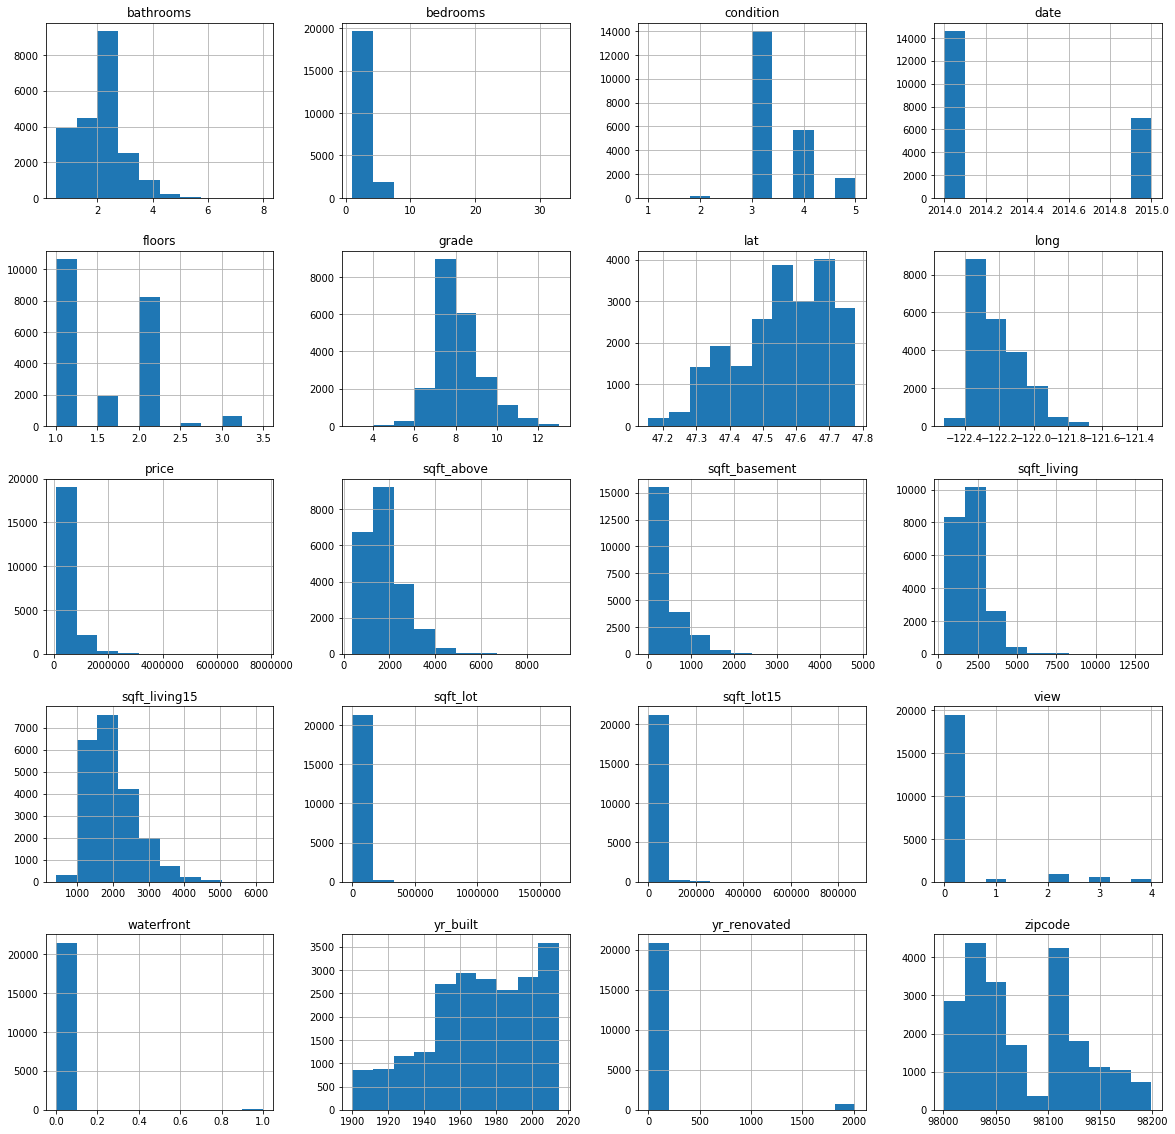

In [58]:
df.hist(figsize=(20,20));
#plt.savefig("hist.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")


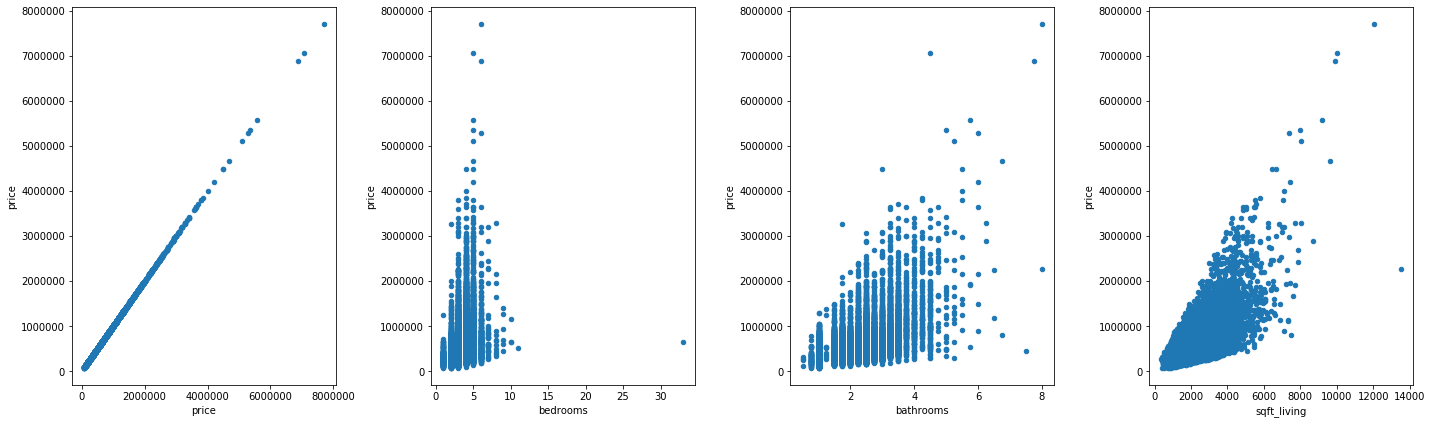

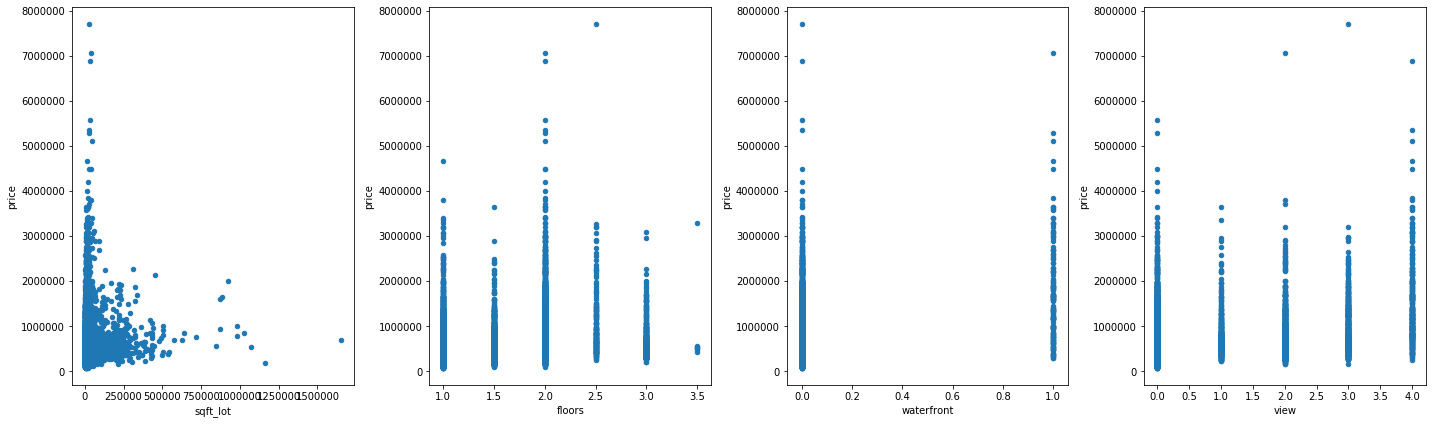

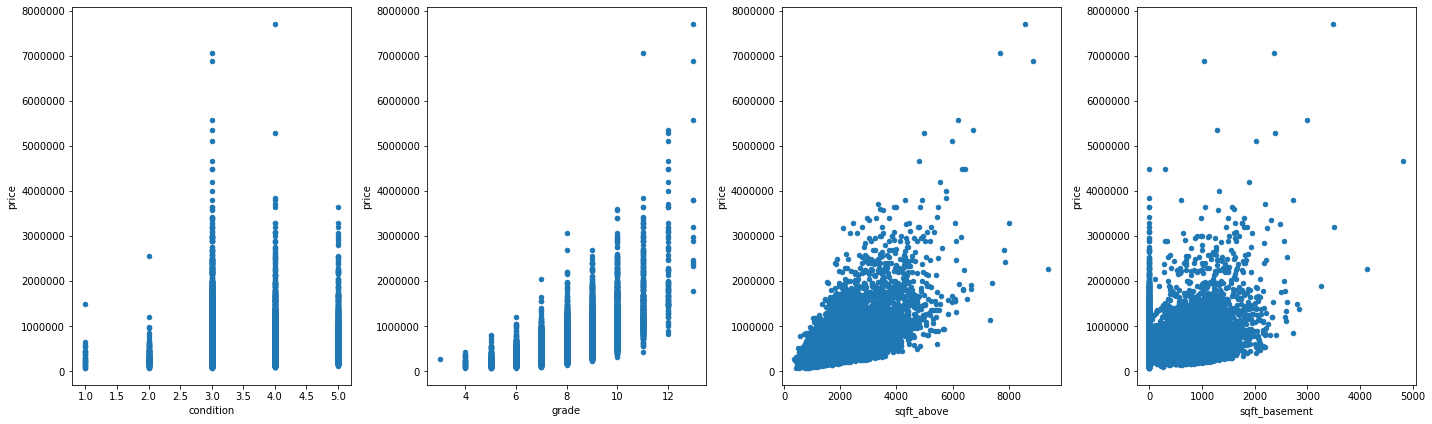

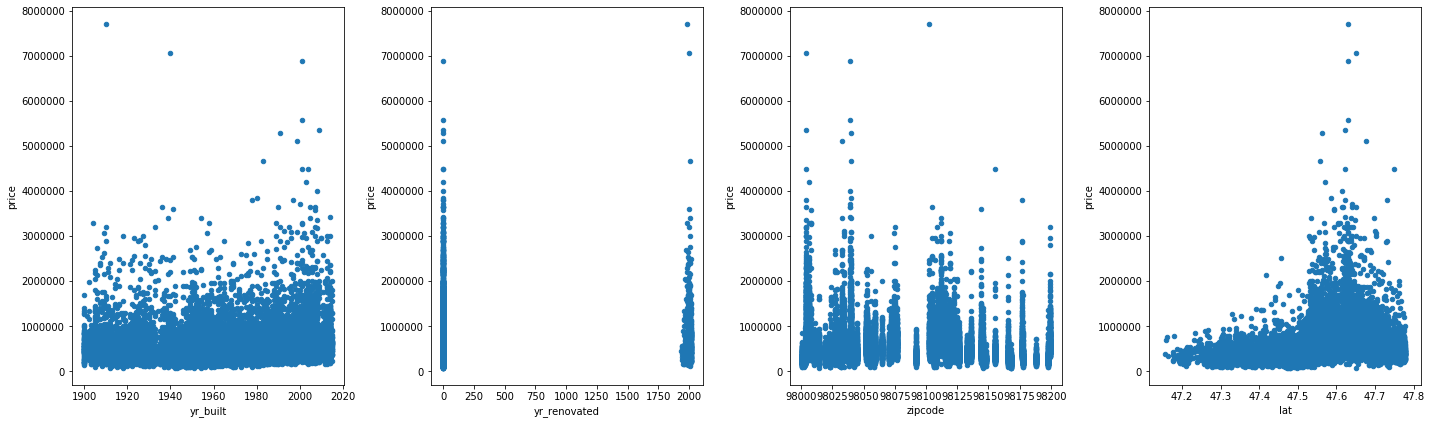

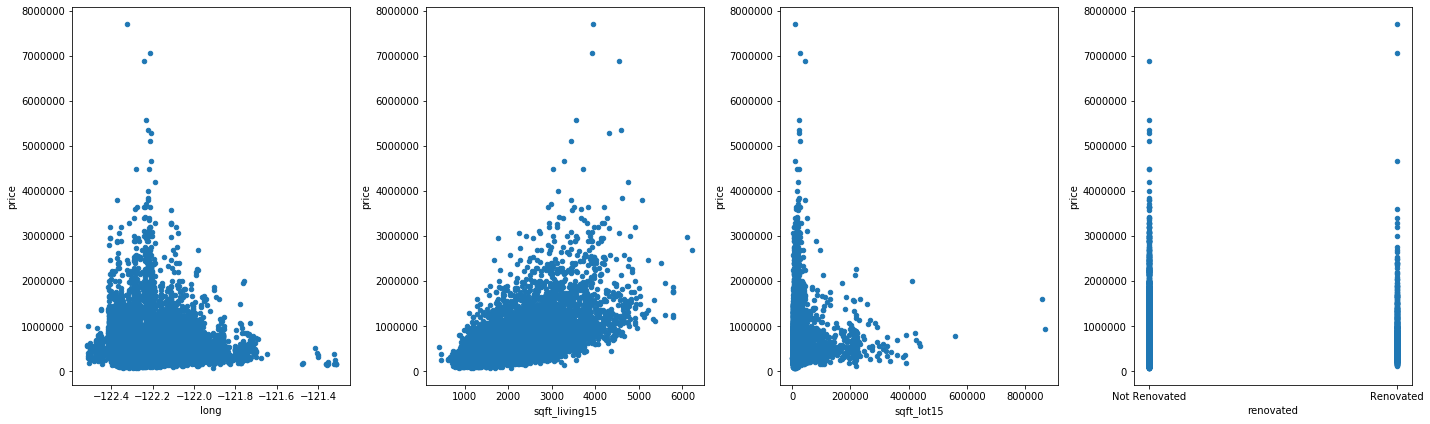

In [59]:

fig, axes = plt.subplots(nrows = 1, ncols= 4,figsize =(20,6))

for xcol, ax in zip(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    df.plot(kind =  "scatter", x = xcol, y = "price", ax = ax)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols= 4,figsize =(20,6))

for xcol, ax in zip(['sqft_lot', 'floors',
       'waterfront', 'view'], axes):
    df.plot(kind =  "scatter", x = xcol, y = "price", ax = ax)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols= 4,figsize =(20,6))

for xcol, ax in zip(['condition', 'grade', 'sqft_above',
       'sqft_basement'], axes):
    df.plot(kind =  "scatter", x = xcol, y = "price", ax = ax)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols= 4,figsize =(20,6))

for xcol, ax in zip(['yr_built', 'yr_renovated', 'zipcode', 'lat'], axes):
    df.plot(kind =  "scatter", x = xcol, y = "price", ax = ax)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols= 4,figsize =(20,6))

for xcol, ax in zip(['long',
       'sqft_living15', 'sqft_lot15',"renovated"], axes):
    df.plot(kind =  "scatter", x = xcol, y = "price", ax = ax)
plt.tight_layout()
plt.show()



## correlation

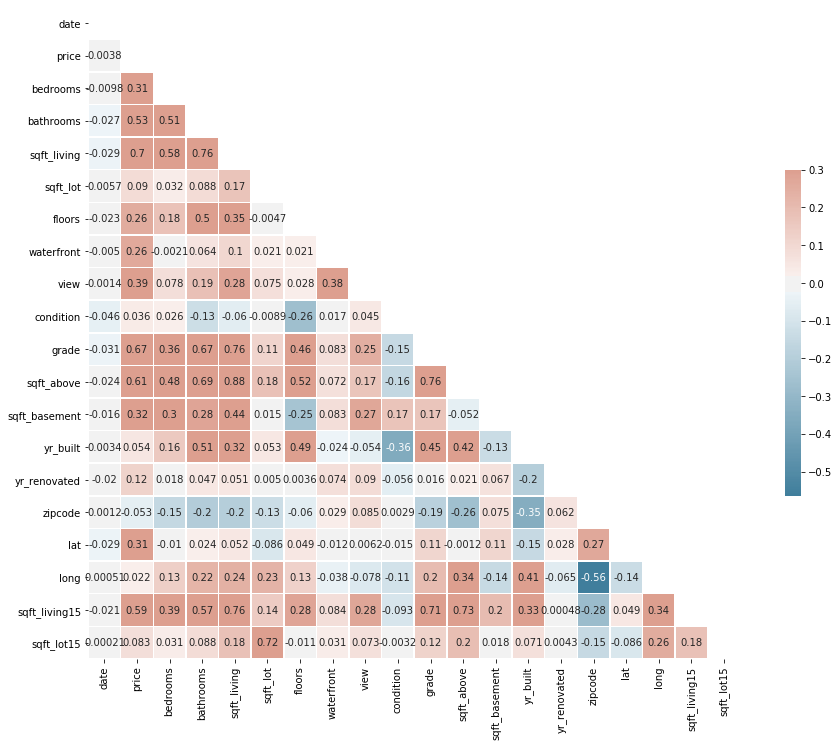

In [60]:

# Compute the correlation matrix
corr= df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (16,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap =True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap =cmap,annot=True, vmax =.3, center =0,
            square =True, linewidths = .5, cbar_kws= {"shrink": .5})
#plt.savefig("Heatmap.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")

## explore 

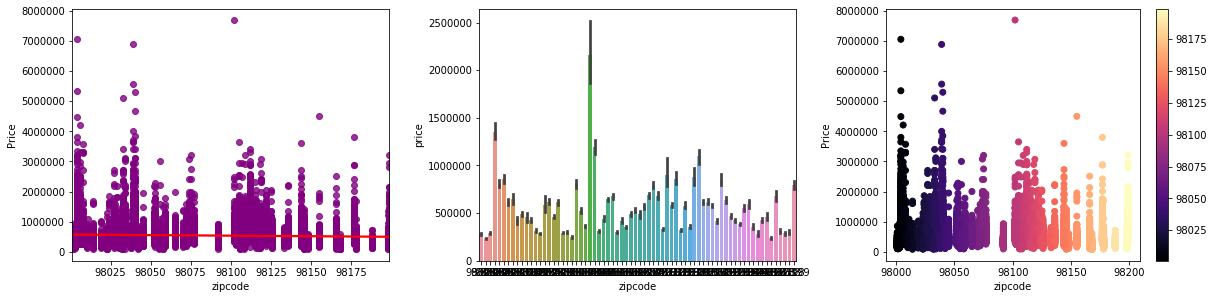

<Figure size 576x576 with 0 Axes>

In [63]:


def eda(col): 
    
    plt.rcParams['figure.figsize'] = [8,8]
    fig = plt.figure(figsize=(17,12))
    #fig.suptitle("Exploring The PDFs",y=1.1,fontsize=25,fontweight="bold", color="black", position=(0.5,.99))
    #fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')
    ax1 = fig.add_subplot(331)

    ax1 = fig.add_subplot(331)
    sns.regplot(df[col], df["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
    ax1.set_xlabel(col)
    ax1.set_ylabel("Price")

    ax2 = fig.add_subplot(332)
    sns.barplot(df[col], df["price"])
    
    ax3 = fig.add_subplot(333)
    
    h =ax3.scatter(df[col], df["price"],c=df[col], cmap='magma')
    ax3.set_xlabel(col)
    ax3.set_ylabel("Price")


    #cbar_ax = fig.add_axes([1, 0.22, 0.05, 0.7])

    fig.colorbar(h)
    fig.tight_layout()
    plt.show()
columns = ['bedrooms', 'bathrooms', 'sqft_living',  'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15', "zipcode"]
"""for col in columns:
    eda(col)"""
#eda("floors")
eda("zipcode")
#eda("bedrooms")
#eda("grade")
#plt.savefig("Zipcode.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")

## Dealing with Outliers

In [64]:
df.shape

(21593, 21)

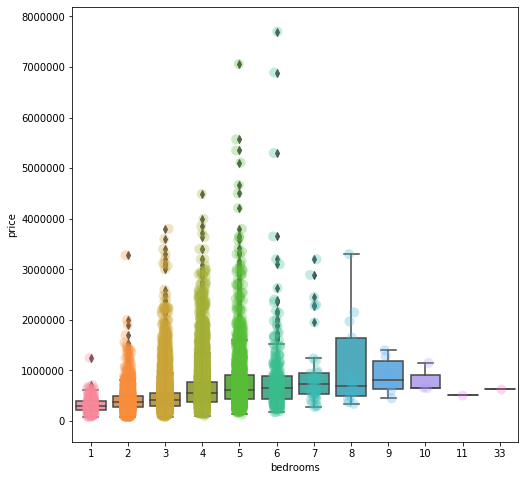

In [65]:
sns.boxplot(x="bedrooms", y="price", data=df)
sns.stripplot(x="bedrooms", y="price", data=df,size=10, alpha=0.3)

In [66]:
Q1 = df["bathrooms"].quantile(0.25)
Q3 = df["bathrooms"].quantile(0.75)
IQR = Q3 - Q1
df_outlier =df[((df["bathrooms"] > (Q1 - 1.5 * IQR))&(df["bathrooms"] < (Q3 + 1.5 * IQR)))]
df_outlier.shape


Q1 = df["sqft_living"].quantile(0.25)
Q3 = df["sqft_living"].quantile(0.75)
IQR = Q3 - Q1
df_outlier =df[((df["sqft_living"] > (Q1 - 1.5 * IQR))&(df["sqft_living"] < (Q3 + 1.5 * IQR)))]
df_outlier.shape



Q1 = df["sqft_living15"].quantile(0.25)
Q3 = df["sqft_living15"].quantile(0.75)
IQR = Q3 - Q1
df_outlier =df[((df["sqft_living15"] > (Q1 - 1.5 * IQR))&(df["sqft_living15"] < (Q3 + 1.5 * IQR)))]
df_outlier.shape



Q1 = df["grade"].quantile(0.25)
Q3 = df["grade"].quantile(0.75)
IQR = Q3 - Q1
df_outlier =df[((df["grade"] > (Q1 - 1.5 * IQR))&(df["grade"] < (Q3 + 1.5 * IQR)))]
df_outlier.shape



Q1 = df["sqft_above"].quantile(0.25)
Q3 = df["sqft_above"].quantile(0.75)
IQR = Q3 - Q1
df_outlier =df[((df["sqft_above"] > (Q1 - 1.5 * IQR))&(df["sqft_above"] < (Q3 + 1.5 * IQR)))]
df_outlier.shape





(20975, 21)

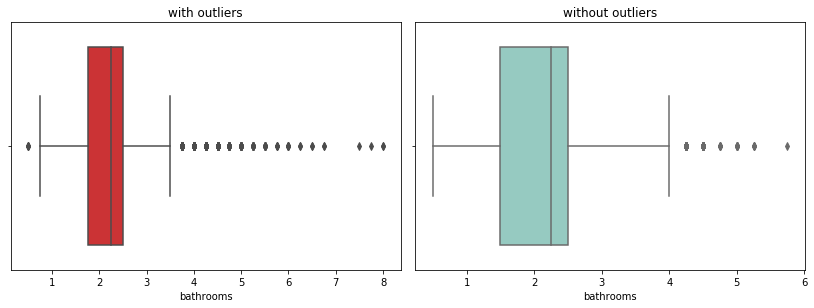

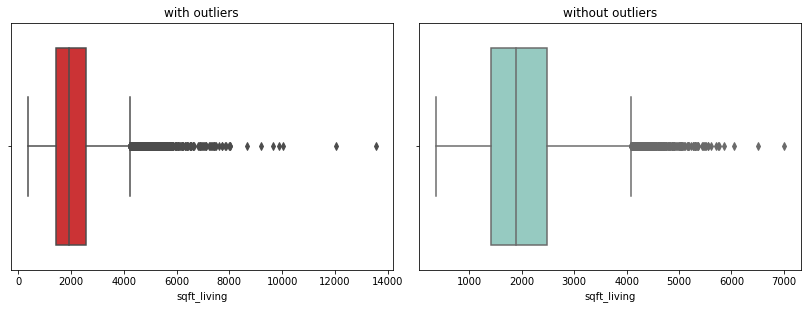

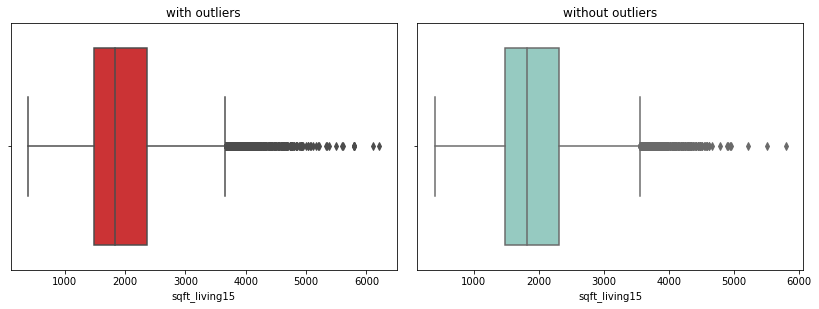

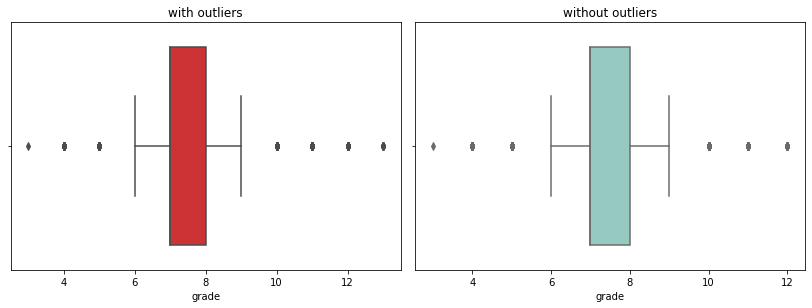

In [84]:
def df_outlier_eda(col): 
    
    plt.rcParams['figure.figsize'] = [8,8]
    fig = plt.figure(figsize=(17,12))
    #fig.suptitle("Exploring The PDFs",y=1.1,fontsize=25,fontweight="bold", color="black", position=(0.5,.99))
    #fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')
    ax1 = fig.add_subplot(331)

    ax1 = fig.add_subplot(331)
    sns.boxplot(df[col], palette="Set1")
    ax1.set_xlabel(col)
    ax1.set_title("with outliers")

    ax2 = fig.add_subplot(332)
    sns.boxplot(df_outlier[col],  palette="Set3")
    ax2.set_title("without outliers")

    fig.tight_layout()
    plt.show()

df_outlier_eda("bathrooms")
df_outlier_eda("sqft_living")
df_outlier_eda("sqft_living15")
df_outlier_eda("grade")

## log-transform

In [68]:
df_outlier["price"] = np.log(df_outlier["price"])

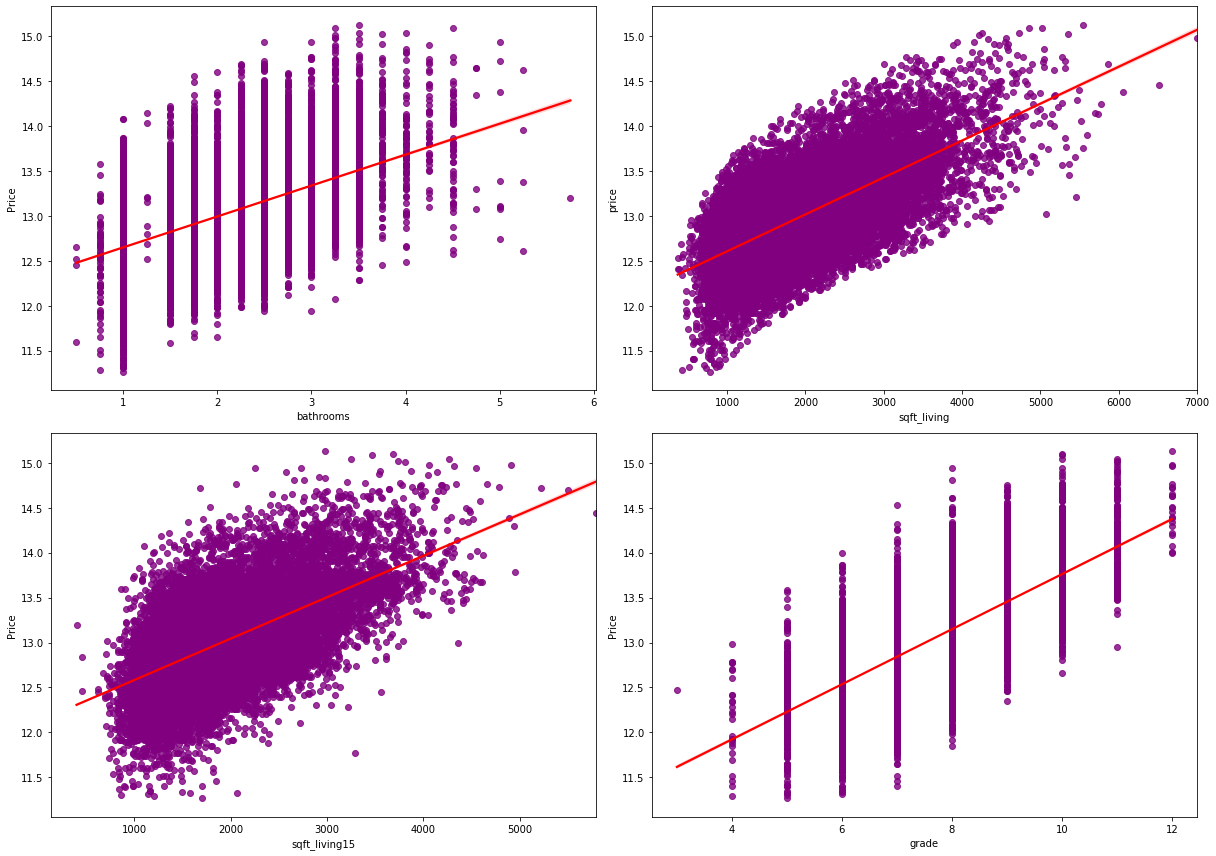

In [81]:
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.figure(figsize=(17,12))
#fig.suptitle("Exploring The PDFs",y=1.1,fontsize=25,fontweight="bold", color="black", position=(0.5,.99))
#fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')
ax1 = fig.add_subplot(221)

ax1 = fig.add_subplot(221)
sns.regplot(df_outlier["bathrooms"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
ax1.set_xlabel("bathrooms")
ax1.set_ylabel("Price")

ax2 = fig.add_subplot(222)
sns.regplot(df_outlier["sqft_living"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})

ax3 = fig.add_subplot(223)

sns.regplot(df_outlier["sqft_living15"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
ax3.set_ylabel("Price")

ax4 = fig.add_subplot(224)

sns.regplot(df_outlier["grade"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
ax4.set_ylabel("Price")
#cbar_ax = fig.add_axes([1, 0.22, 0.05, 0.7])

#fig.colorbar(h)
fig.tight_layout()
plt.show()


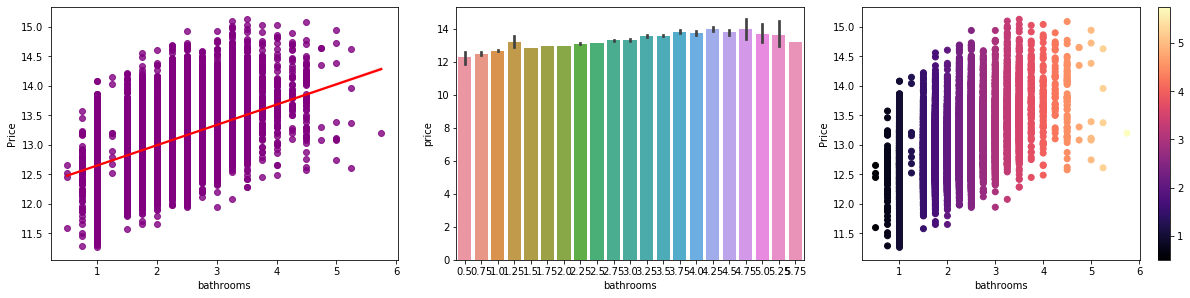

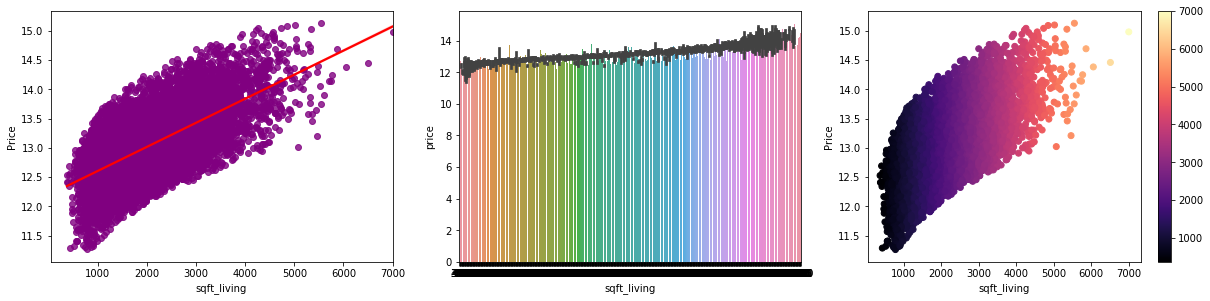

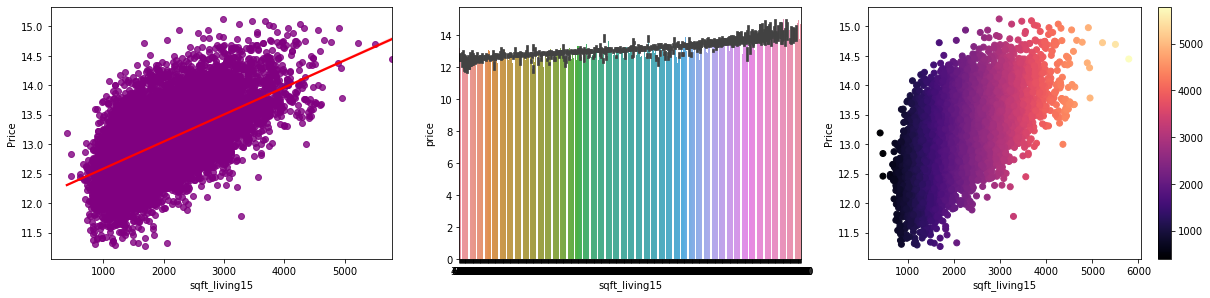

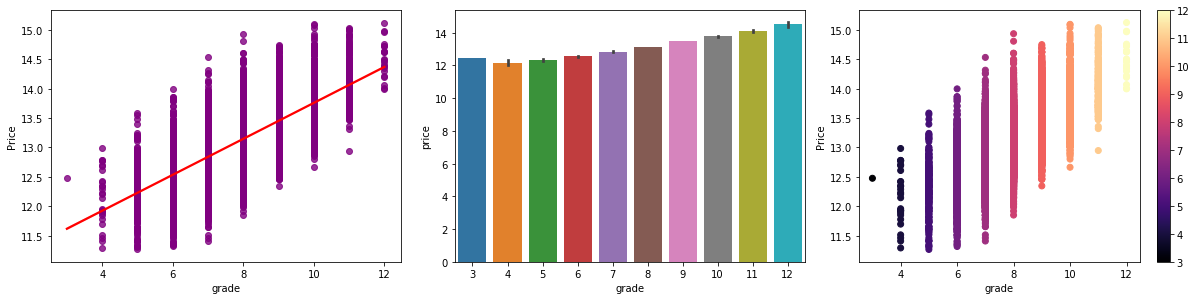

In [82]:
def df_outlier_eda(col): 
    
    plt.rcParams['figure.figsize'] = [8,8]
    fig = plt.figure(figsize=(17,12))
    #fig.suptitle("Exploring The PDFs",y=1.1,fontsize=25,fontweight="bold", color="black", position=(0.5,.99))
    #fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')
    ax1 = fig.add_subplot(331)

    ax1 = fig.add_subplot(331)
    sns.regplot(df_outlier[col], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
    ax1.set_xlabel(col)
    ax1.set_ylabel("Price")

    ax2 = fig.add_subplot(332)
    sns.barplot(df_outlier[col], df_outlier["price"])
    
    ax3 = fig.add_subplot(333)
    
    h =ax3.scatter(df_outlier[col], df_outlier["price"],c=df_outlier[col], cmap='magma')
    ax3.set_xlabel(col)
    ax3.set_ylabel("Price")


    #cbar_ax = fig.add_axes([1, 0.22, 0.05, 0.7])

    fig.colorbar(h)
    fig.tight_layout()
    plt.show()
columns = ['bedrooms', 'bathrooms', 'sqft_living',  'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'renovated', 
       'sqft_living15', 'sqft_lot15']
"""for col in columns:
    df_outlier_eda(col)"""

df_outlier_eda("bathrooms")
df_outlier_eda("sqft_living")
df_outlier_eda("sqft_living15")
df_outlier_eda("grade")
#eda("grade")

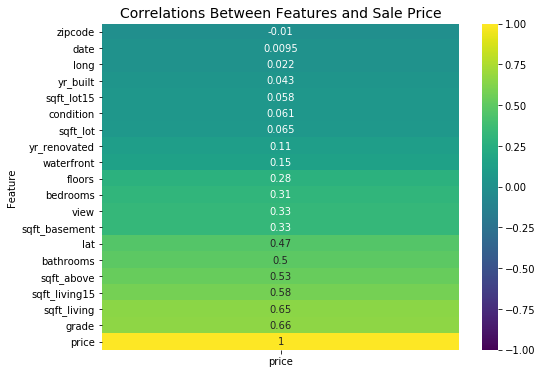

In [95]:
corr_matrix = df_outlier.corr()[['price']].sort_values('price')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Features and Sale Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

In [96]:
# our correlations feature

feats = ['bathrooms', 'sqft_living', 'sqft_living15',
        'grade', 'sqft_above']
       

## correlation 

In [97]:
abs(df_outlier.corr()>.75)
df_outlier.corr()['price'].sort_values(ascending=False)

abs(df_outlier.corr()>.5)['price'].sort_values(ascending=False)


price             True
sqft_living       True
sqft_above        True
grade             True
sqft_living15     True
sqft_lot15       False
waterfront       False
bedrooms         False
bathrooms        False
sqft_lot         False
floors           False
condition        False
view             False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
date             False
Name: price, dtype: bool

In [98]:
df_outlier.describe()

date         price      bedrooms    bathrooms   sqft_living  \
count  20975.000000  20975.000000  20975.000000  20975.00000  20975.000000   
mean    2014.323814     13.018020      3.344267      2.07025   2002.760238   
std        0.467941      0.496730      0.912890      0.71606    787.971146   
min     2014.000000     11.264464      1.000000      0.50000    370.000000   
25%     2014.000000     12.673651      3.000000      1.50000   1410.000000   
50%     2014.000000     13.005717      3.000000      2.25000   1880.000000   
75%     2015.000000     13.342302      4.000000      2.50000   2480.000000   
max     2015.000000     15.126542     33.000000      5.75000   7000.000000   

           sqft_lot       floors    waterfront          view     condition  \
count  2.097500e+04  20975.00000  20975.000000  20975.000000  20975.000000   
mean   1.406687e+04      1.47876      0.005816      0.218927      3.416448   
std    3.746853e+04      0.53800      0.076045      0.739076      0.654015   
min    5.200000e+02      1.00000      0.000000      0.000000      1.000000   
25%    5.000000e+03      1.00000      0.000000      0.000000      3.000000   
50%    7.500000e+03      1.00000      0.000000      0.000000      3.000000   
75%    1.035000e+04      2.00000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.50000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  20975.000000  20975.000000   20975.000000  20975.000000  20975.000000   
mean       7.577354   1711.800906     290.959333   1970.305268     68.414827   
std        1.074604    694.888913     434.075084     29.321598    363.150801   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1180.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1540.000000       0.000000   1973.000000      0.000000   
75%        8.000000   2130.000000     570.000000   1995.000000      0.000000   
max       12.000000   3730.000000    3500.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  20975.000000  20975.000000  20975.000000   20975.000000   20975.000000  
mean   98078.728772     47.559151   -122.216879    1943.666269   12144.363242  
std       53.665194      0.139375      0.140083     629.219770   25498.494153  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.467200   -122.330500    1480.000000    5050.000000  
50%    98070.000000     47.570500   -122.237000    1820.000000    7553.000000  
75%    98118.000000     47.678550   -122.129000    2310.000000    9910.000000  
max    98199.000000     47.777600   -121.315000    5790.000000  871200.000000

In [99]:
#this need to be change

# Model

In [100]:
feat = df_outlier[['price','bathrooms', 'sqft_living', 'sqft_living15',
        'grade', 'sqft_above', 'zipcode']]
"""cat = pd.get_dummies(feat['grade'], prefix = "grade", drop_first=True) #drop a column to avoid dummy variable trap
feat = feat.drop('grade',axis = 1)
feat = feat.join(cat)
"""
cat = pd.get_dummies(feat['zipcode'],prefix = "zipcode", drop_first=True) #drop a column to avoid dummy variable trap
feat = feat.drop('zipcode',axis = 1)
feat = feat.join(cat) 
feat


price  bathrooms  sqft_living  sqft_living15  grade  sqft_above  \
0      12.309982       1.00         1180           1340      7        1180   
1      13.195614       2.25         2570           1690      7        2170   
2      12.100712       1.00          770           2720      6         770   
3      13.311329       3.00         1960           1360      7        1050   
4      13.142166       2.00         1680           1800      8        1680   
...          ...        ...          ...            ...    ...         ...   
21592  12.793859       2.50         1530           1530      8        1530   
21593  12.899220       2.50         2310           1830      8        2310   
21594  12.904459       0.75         1020           1020      7        1020   
21595  12.899220       2.50         1600           1410      8        1600   
21596  12.691580       0.75         1020           1020      7        1020   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  ...  \
0                  0              0              0              0  ...   
1                  0              0              0              0  ...   
2                  0              0              0              0  ...   
3                  0              0              0              0  ...   
4                  0              0              0              0  ...   
...              ...            ...            ...            ...  ...   
21592              0              0              0              0  ...   
21593              0              0              0              0  ...   
21594              0              0              0              0  ...   
21595              0              0              0              0  ...   
21596              0              0              0              0  ...   

       zipcode_98146  zipcode_98148  zipcode_98155  zipcode_98166  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              1              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0                  0              0              1              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98198  zipcode_98199  
0                  0              0  
1                  0              0  
2                  0              0  
3                  0              0  
4                  0              0  
...              ...            ...  
21592              0              0  
21593              0              0  
21594              0              0  
21595              0              0  
21596              0              0  

[20975 rows x 75 columns]

In [101]:
features = []
correlations = []
Corr_price = pd.DataFrame()
for idx, cor in corr['price'].T.iteritems():
    if cor>= 0.3 and idx !="price":
        features.append(idx)
        correlations.append(cor) 
Corr_price['Correlations']= correlations
Corr_price['features']= features


Multicollinear_Features = []
Multicollinear_Corr = []
Multicollinear_Corr_df = pd.DataFrame()

def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)
display(MC_df)

Correlations                   Features
0      0.876442  [sqft_living, sqft_above]
1      0.876442  [sqft_above, sqft_living]

In [102]:
df_outlier.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

In [103]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;
# 

<Figure size 576x576 with 0 Axes>

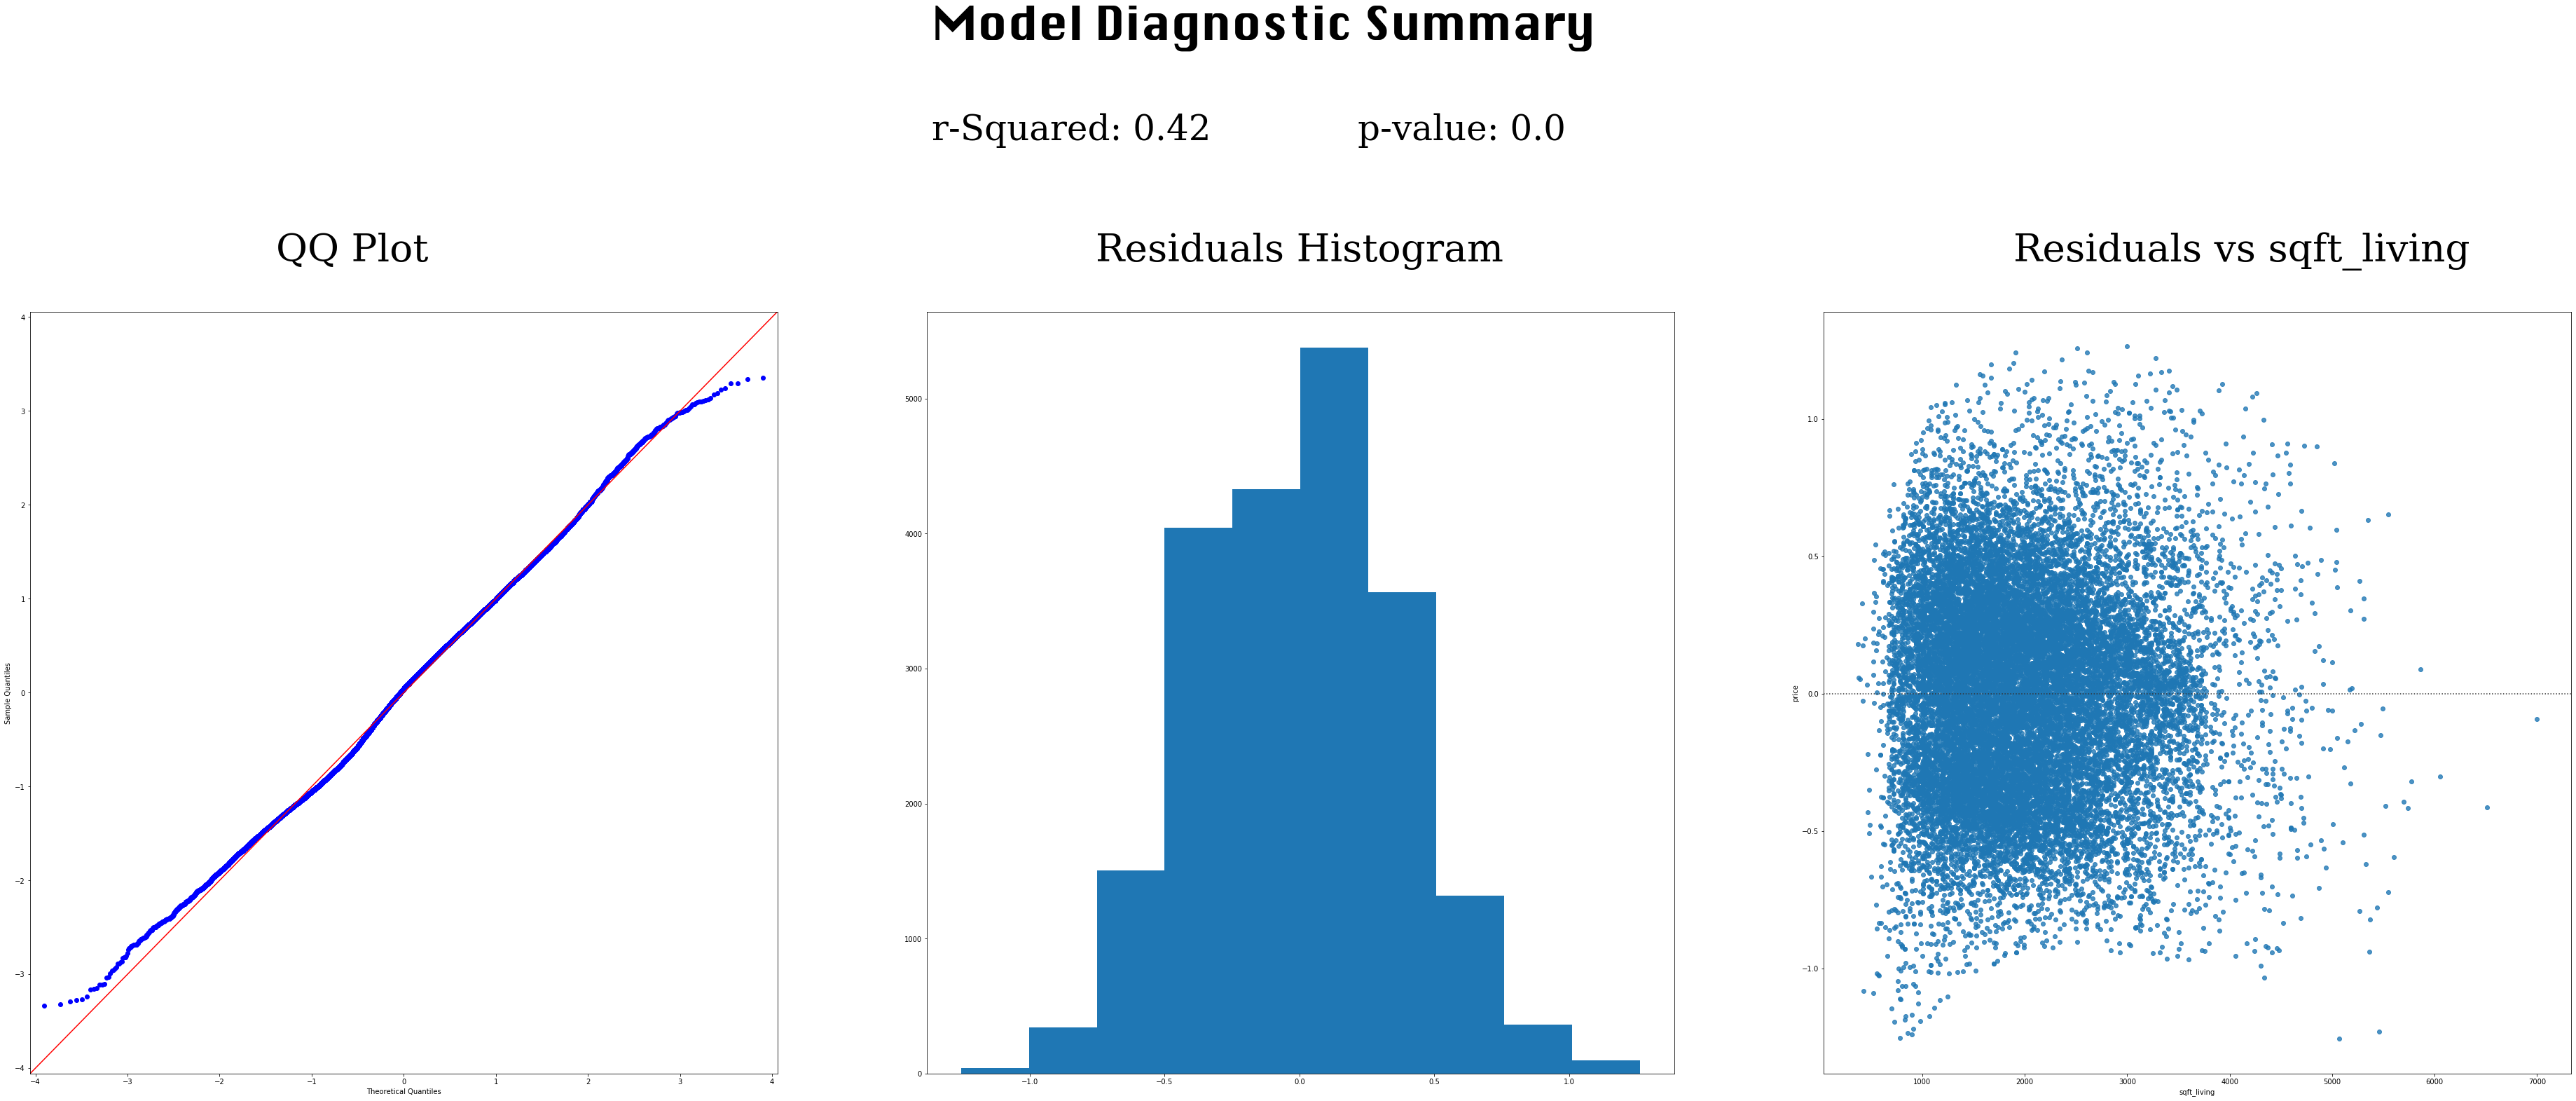

In [104]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["sqft_living"], 'sqft_living', feat["price"])

In [105]:
feat['price'] = np.log(feat['price'])
feat['sqft_living'] = np.log(feat['sqft_living'])

<Figure size 576x576 with 0 Axes>

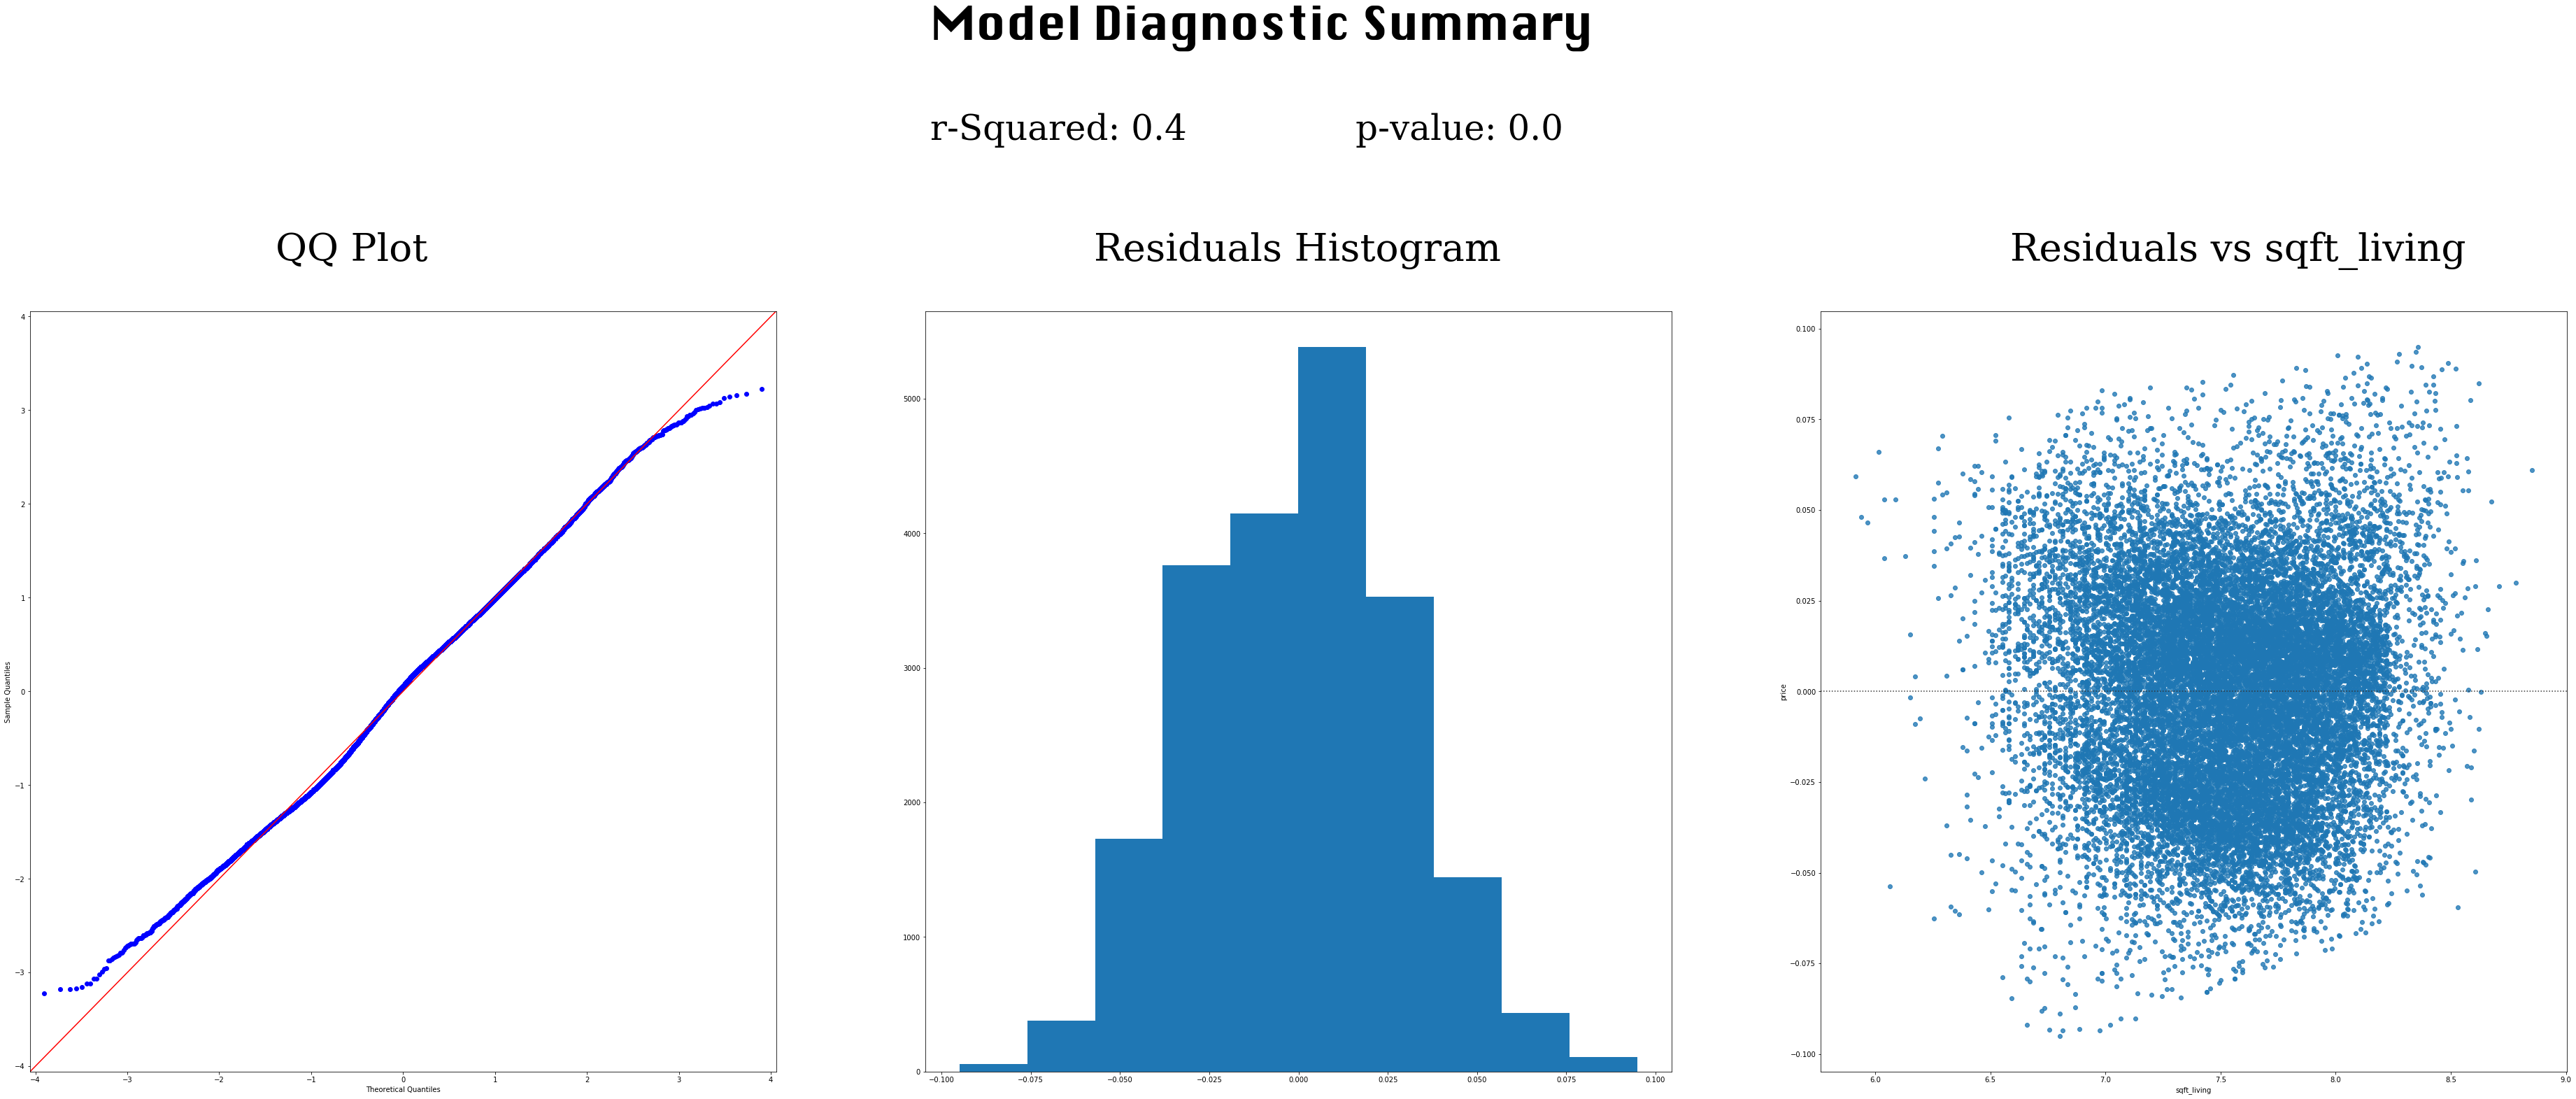

In [106]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat['sqft_living'], 'sqft_living', feat["price"])

<Figure size 576x576 with 0 Axes>

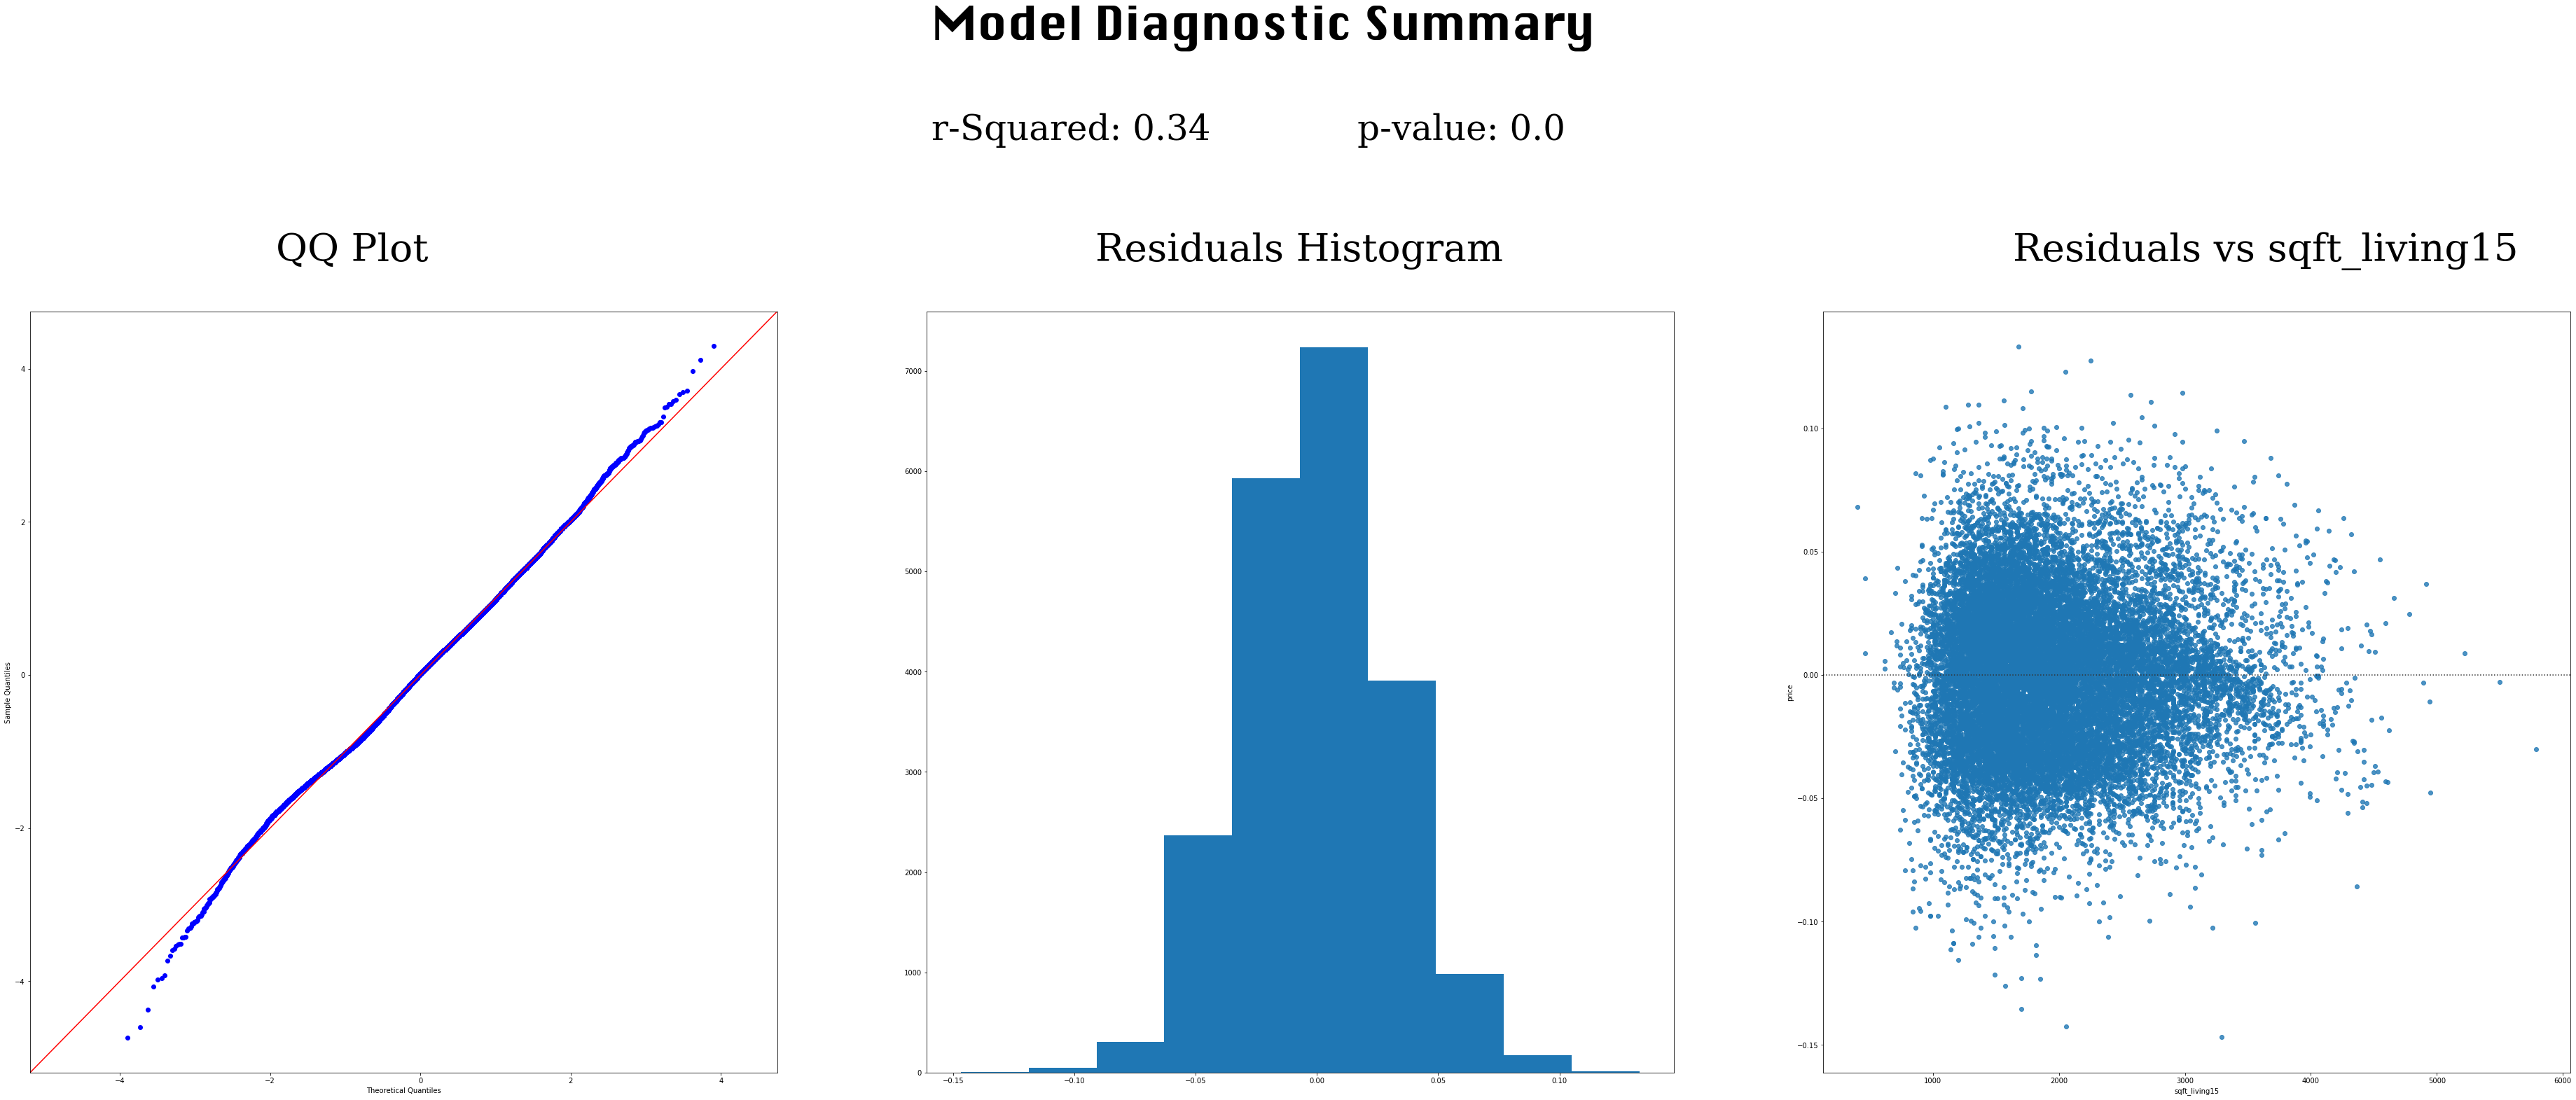

In [107]:
f = 'price~sqft_living15'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["sqft_living15"], 'sqft_living15', feat["price"])

<Figure size 576x576 with 0 Axes>

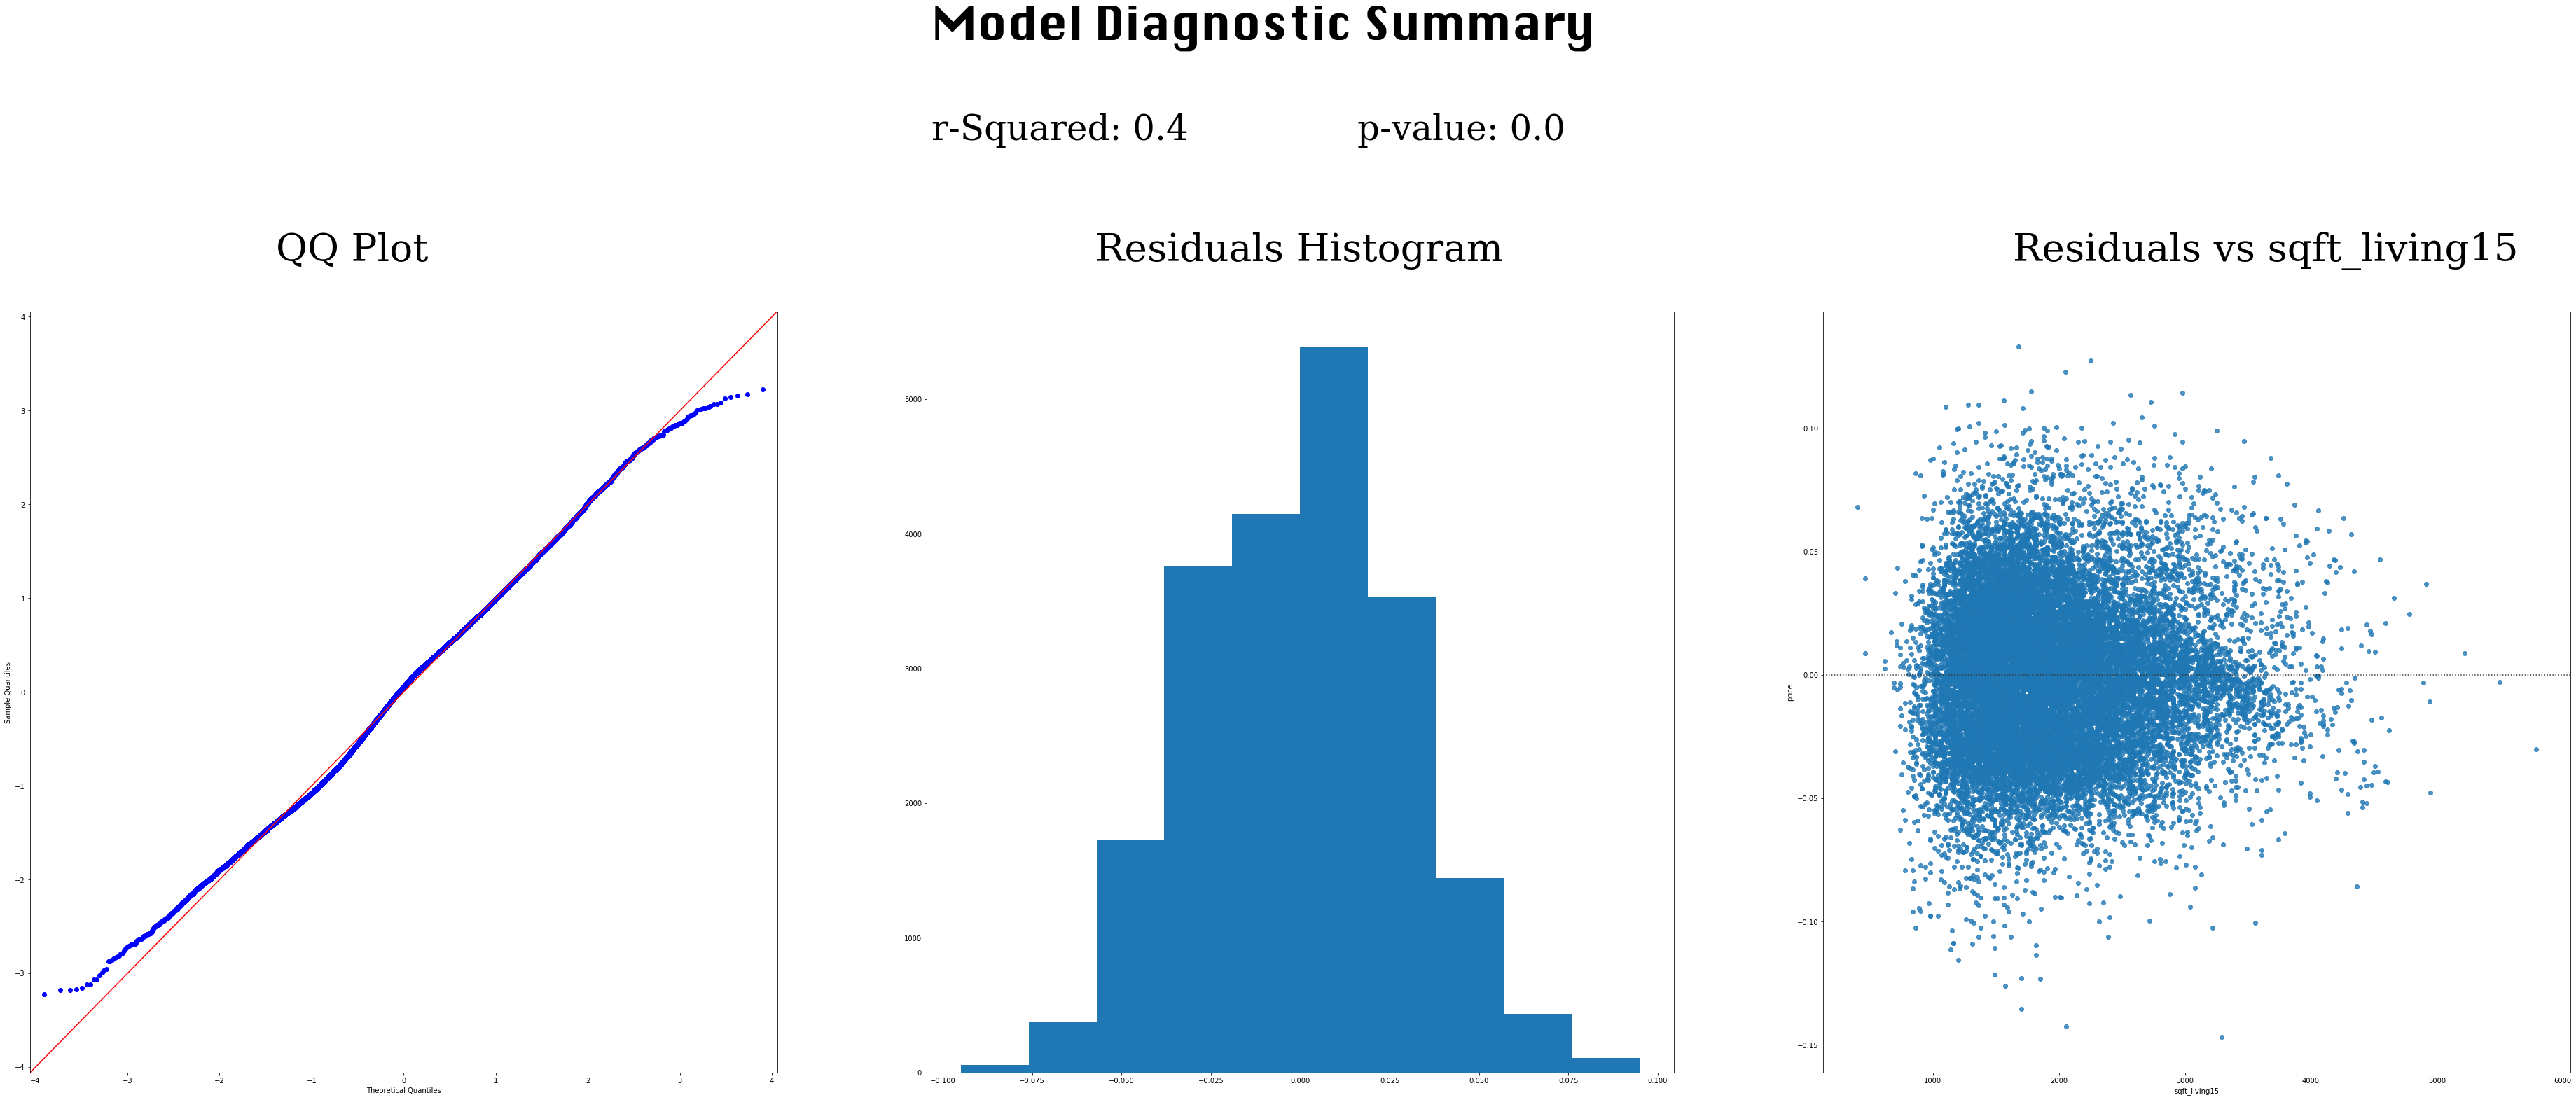

In [108]:
df['sqft_living15'] = np.log(df['sqft_living15'])
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat['sqft_living15'], 'sqft_living15', feat["price"])

<Figure size 576x576 with 0 Axes>

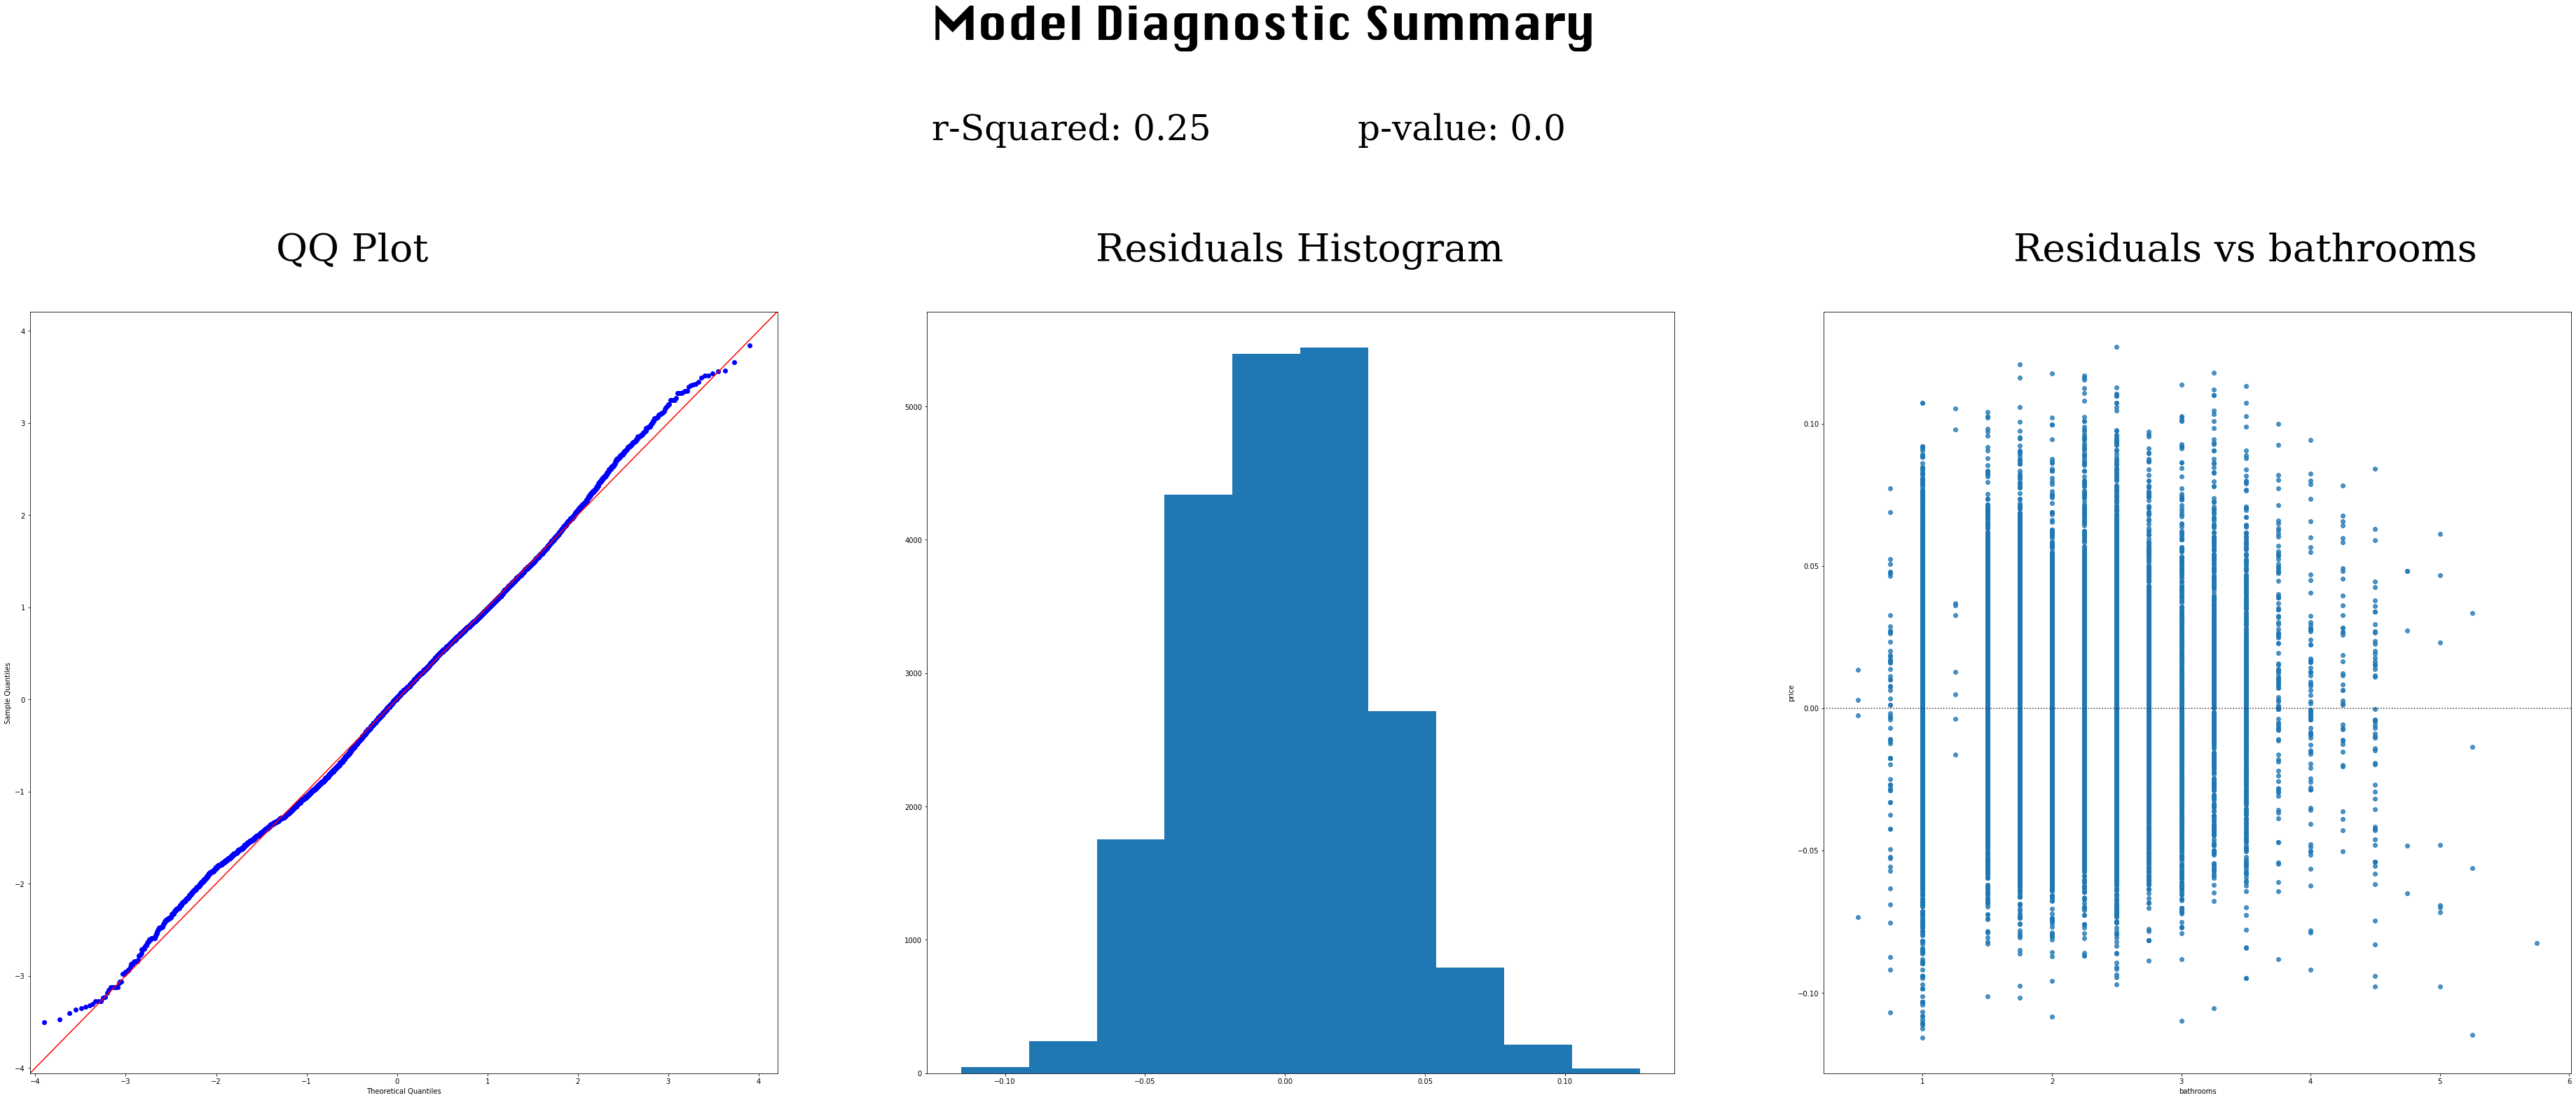

In [109]:
f = 'price~bathrooms'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["bathrooms"], 'bathrooms', feat["price"])

In [110]:
feat.iloc[:,1:]

bathrooms  sqft_living  sqft_living15  grade  sqft_above  \
0           1.00     7.073270           1340      7        1180   
1           2.25     7.851661           1690      7        2170   
2           1.00     6.646391           2720      6         770   
3           3.00     7.580700           1360      7        1050   
4           2.00     7.426549           1800      8        1680   
...          ...          ...            ...    ...         ...   
21592       2.50     7.333023           1530      8        1530   
21593       2.50     7.745003           1830      8        2310   
21594       0.75     6.927558           1020      7        1020   
21595       2.50     7.377759           1410      8        1600   
21596       0.75     6.927558           1020      7        1020   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98006  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0                  0  ...              0              0              0   
1                  0  ...              0              0              0   
2                  0  ...              0              0              0   
3                  0  ...              0              0              0   
4                  0  ...              0              0              0   
...              ...  ...            ...            ...            ...   
21592              0  ...              0              0              0   
21593              0  ...              1              0              0   
21594              0  ...              0              0              0   
21595              0  ...              0              0              0   
21596              0  ...              0              0              0   

       zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0                  0              0              0              1   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98188  zipcode_98198  zipcode_98199  
0                  0              0              0  
1                  0              0              0  
2                  0              0              0  
3                  0              0              0  
4                  0              0              0  
...              ...            ...            ...  
21592              0              0              0  
21593              0              0              0  
21594              0              0              0  
21595              0              0              0  
21596              0              0              0  

[20975 rows x 74 c

<Figure size 576x576 with 0 Axes>

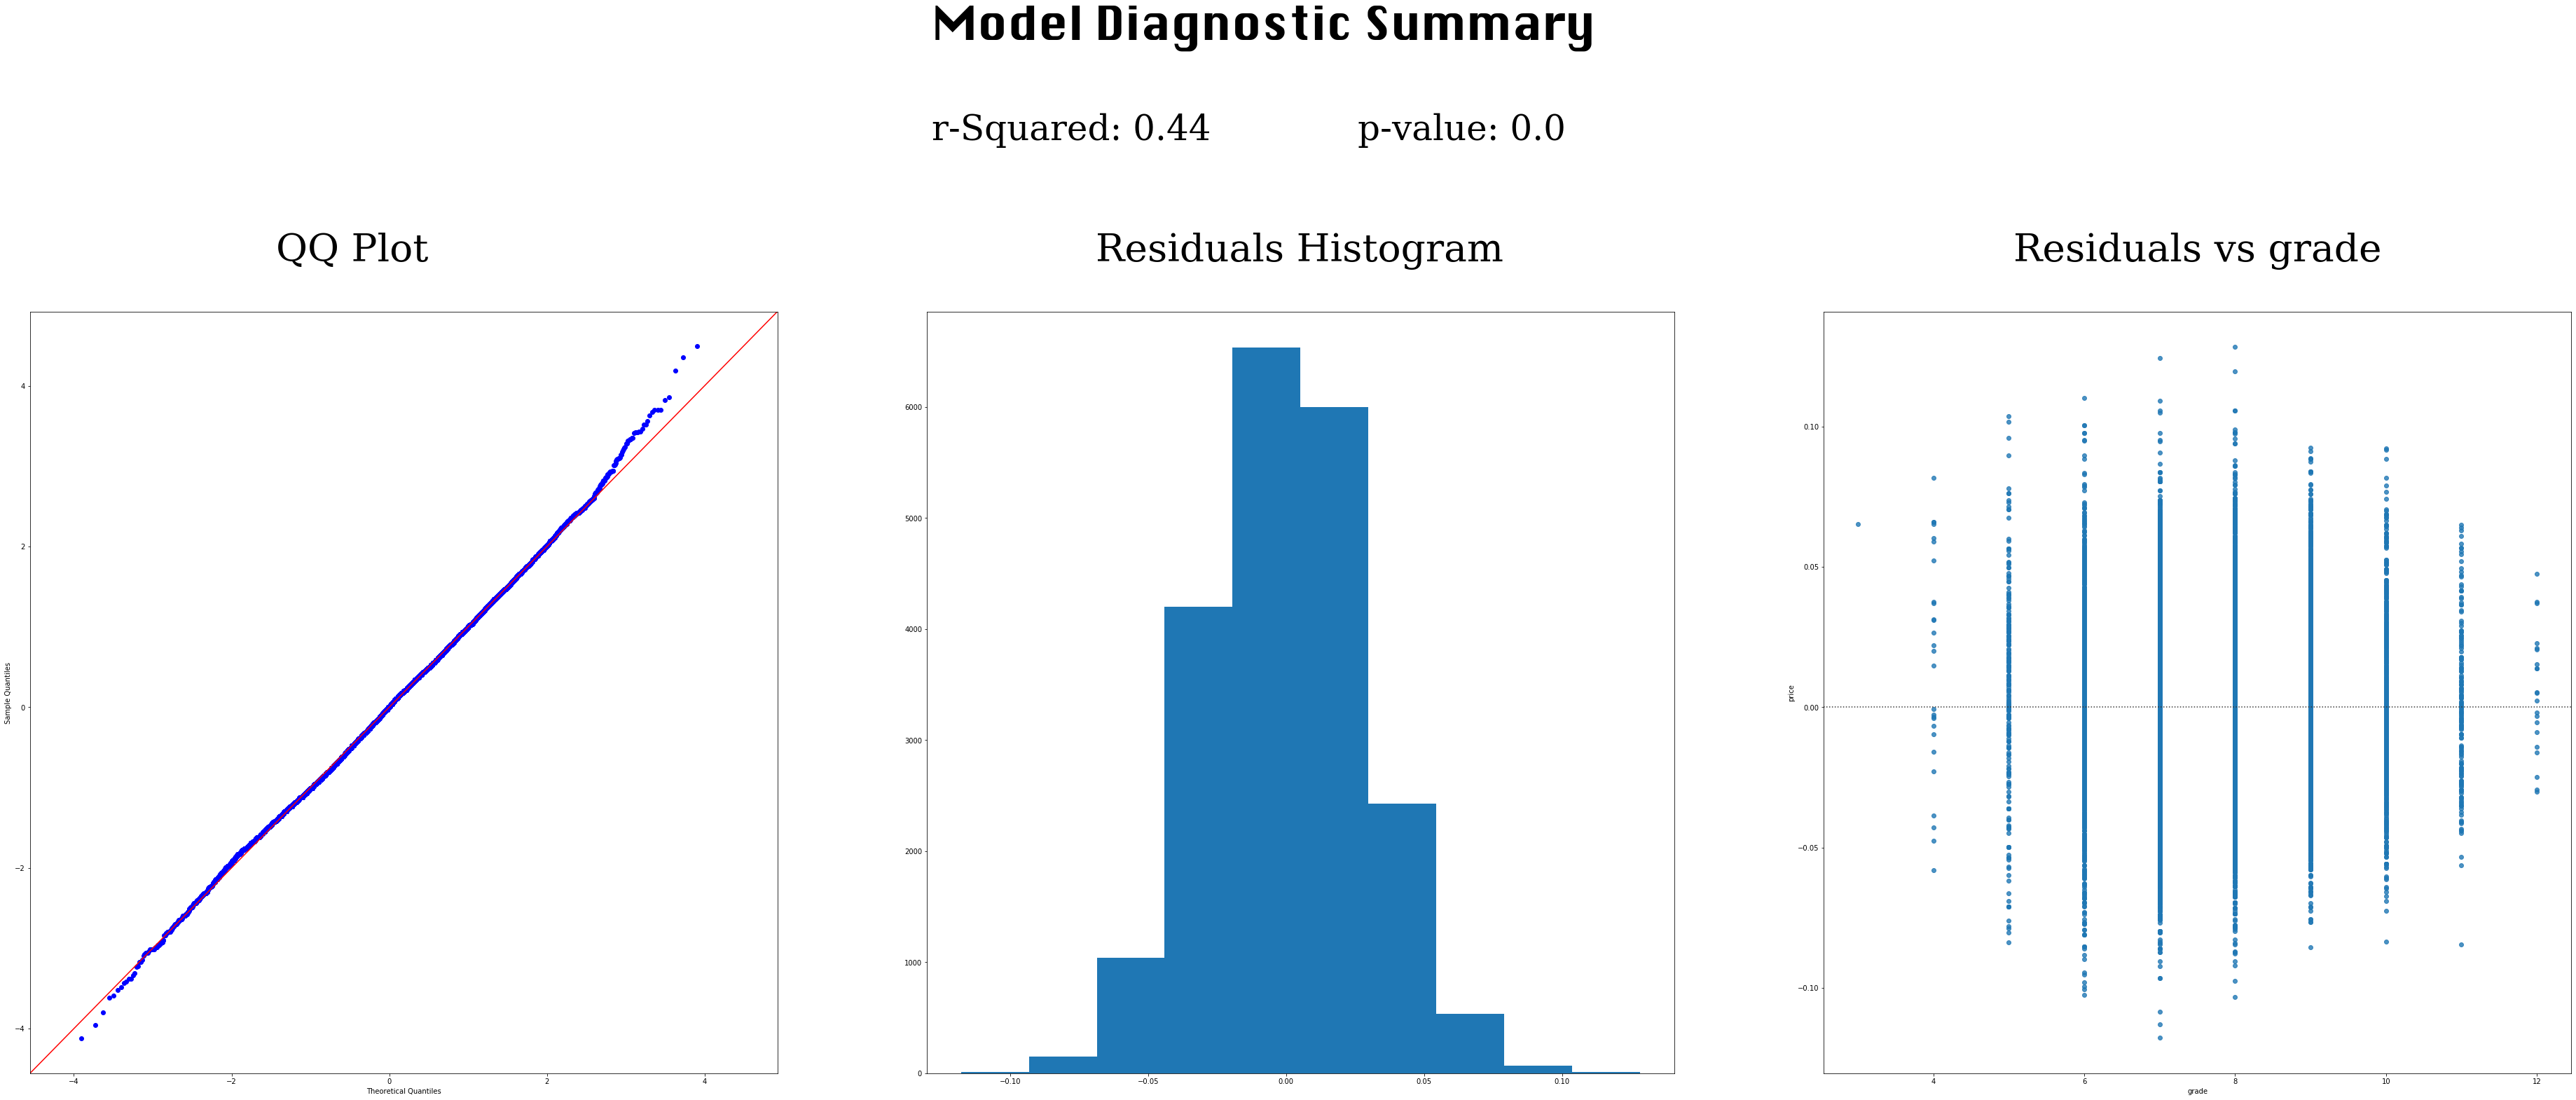

In [112]:
f = 'price~grade'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["grade"], 'grade', feat["price"])

 # Multiple Regression

## Model_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5193.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:43:23   Log-Likelihood:                 46027.
No. Observations:               20975   AIC:                        -9.204e+04
Df Residuals:                   20970   BIC:                        -9.200e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1423      0.006    353.928      0.000       2.130       2.154
bathrooms      -0.0017      0.000     -4.258      0.000      -0.002      -0.001
sqft_living     0.0418      0.001     44.426      0.000       0.040       0.044
grade           0.0166      0.000     62.804      0.000       0.016       0.017
sqft_above  -7.653e-06   4.91e-07    -15.587      0.000   -8.62e-06   -6.69e-06
==============================================================================
Omnibus:                       14.301   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.199
Skew:                           0.056   Prob(JB):                     0.000825
Kurtosis:                       2.940   Cond. No.                     6.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

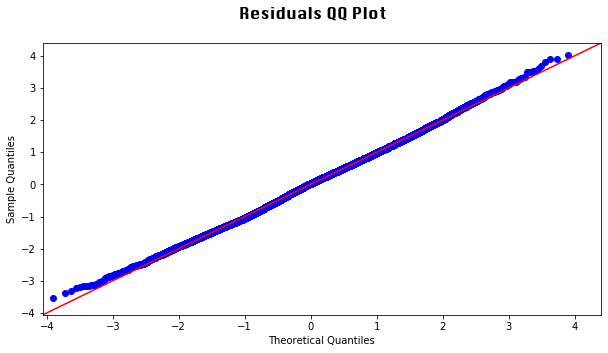

In [116]:
outcome = "price"

x_col =list(feat.iloc[:,1:6])
sqft_living15 =  "sqft_living15"
x_col.remove(sqft_living15)
predictors = "+".join(x_col)
#formula ="price ~ bathrooms +sqft_living+sqft_living15+grade+sqft_above+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125"
formula = outcome +"~"+predictors     
Model_1 = smf.ols(formula=formula, data=feat).fit()
Model_1.summary()

residuals = Model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()
Model_1.summary()

## Model_2

In [117]:
feat.iloc[:,1:]

bathrooms  sqft_living  sqft_living15  grade  sqft_above  \
0           1.00     7.073270           1340      7        1180   
1           2.25     7.851661           1690      7        2170   
2           1.00     6.646391           2720      6         770   
3           3.00     7.580700           1360      7        1050   
4           2.00     7.426549           1800      8        1680   
...          ...          ...            ...    ...         ...   
21592       2.50     7.333023           1530      8        1530   
21593       2.50     7.745003           1830      8        2310   
21594       0.75     6.927558           1020      7        1020   
21595       2.50     7.377759           1410      8        1600   
21596       0.75     6.927558           1020      7        1020   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98006  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0                  0  ...              0              0              0   
1                  0  ...              0              0              0   
2                  0  ...              0              0              0   
3                  0  ...              0              0              0   
4                  0  ...              0              0              0   
...              ...  ...            ...            ...            ...   
21592              0  ...              0              0              0   
21593              0  ...              1              0              0   
21594              0  ...              0              0              0   
21595              0  ...              0              0              0   
21596              0  ...              0              0              0   

       zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0                  0              0              0              1   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98188  zipcode_98198  zipcode_98199  
0                  0              0              0  
1                  0              0              0  
2                  0              0              0  
3                  0              0              0  
4                  0              0              0  
...              ...            ...            ...  
21592              0              0              0  
21593              0              0              0  
21594              0              0              0  
21595              0              0              0  
21596              0              0              0  

[20975 rows x 74 c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1249.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:43:25   Log-Likelihood:                 56421.
No. Observations:               20975   AIC:                        -1.127e+05
Df Residuals:                   20901   BIC:                        -1.121e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4203      0.001   1876.680      0.000       2.418       2.423
bathrooms         0.0056      0.000     25.347      0.000       0.005       0.006
sqft_living15  1.322e-05   2.94e-07     45.052      0.000    1.26e-05    1.38e-05
grade             0.0069      0.000     38.864      0.000       0.007       0.007
sqft_above     1.061e-05   2.84e-07     37.314      0.000    1.01e-05    1.12e-05
zipcode_98002    -0.0003      0.001     -0.228      0.820      -0.003       0.003
zipcode_98003     0.0022      0.001      1.633      0.102      -0.000       0.005
zipcode_98004     0.0840      0.001     62.417      0.000       0.081       0.087
zipcode_98005     0.0587      0.002     37.139      0.000       0.056       0.062
zipcode_98006     0.0523      0.001     44.070      0.000       0.050       0.055
zipcode_98007     0.0508      0.002     30.849      0.000       0.048       0.054
zipcode_98008     0.0553      0.001     41.874      0.000       0.053       0.058
zipcode_98010     0.0227      0.002     11.971      0.000       0.019       0.026
zipcode_98011     0.0331      0.001     22.419      0.000       0.030       0.036
zipcode_98014     0.0267      0.002     15.322      0.000       0.023       0.030
zipcode_98019     0.0234      0.001     15.687      0.000       0.020       0.026
zipcode_98022     0.0107      0.001      7.682      0.000       0.008       0.013
zipcode_98023    -0.0021      0.001     -1.838      0.066      -0.004       0.000
zipcode_98024     0.0372      0.002     17.098      0.000       0.033       0.042
zipcode_98027     0.0390      0.001     32.258      0.000       0.037       0.041
zipcode_98028     0.0329      0.001     25.047      0.000       0.030       0.035
zipcode_98029     0.0406      0.001     31.643      0.000       0.038       0.043
zipcode_98030     0.0026      0.001      1.923      0.054   -4.96e-05       0.005
zipcode_98031     0.0053      0.001      4.033      0.000       0.003       0.008
zipcode_98032     0.0005      0.002      0.302      0.763      -0.003       0.004
zipcode_98033     0.0604      0.001     50.512      0.000       0.058       0.063
zipcode_98034     0.0430      0.001     38.220      0.000       0.041       0.045
zipcode_98038     0.0098      0.001      8.869      0.000       0.008       0.012
zipcode_98039     0.0956      0.003     31.367      0.000       0.090       0.102
zipcode_98040     0.0692      0.001     50.333      0.000       0.067       0.072
zipcode_98042     0.0040      0.001      3.571      0.000       0.002       0.006
zipcode_98045     0.0267      0.001     18.710      0.000       0.024       0.030
zipcode_98052     0.0470      0.001     41.919      0.000       0.045       0.049
zipcode_98053     0.0426      0.001     34.207      0.000       0.040       0.045
zipcode_98055     0.0107      0.001      8.007   

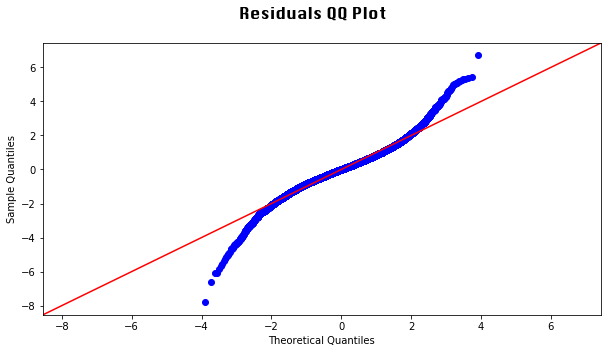

In [118]:
outcome = "price"
x_col =list(feat.iloc[:,1:])
sqft_living =  "sqft_living"
x_col.remove(sqft_living)
predictors = "+".join(x_col)

formula = outcome +"~"+predictors     
Model_2 = smf.ols(formula=formula, data=feat).fit()
residuals = Model_2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()
Model_2.summary()



In [119]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation <= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

Correlations                     Features
217      0.731745  [sqft_above, sqft_living15]
343      0.731745  [sqft_living15, sqft_above]
108      0.718200       [sqft_lot, sqft_lot15]
356      0.718200       [sqft_lot15, sqft_lot]
200      0.714061       [grade, sqft_living15]
..            ...                          ...
289     -0.347304          [zipcode, yr_built]
247     -0.361498        [yr_built, condition]
178     -0.361498        [condition, yr_built]
292     -0.564229              [zipcode, long]
329     -0.564229              [long, zipcode]

[370 rows x 2 columns]

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = feat[x_col]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_col, vif))

[('bathrooms', 18.02333014092301),
 ('sqft_living15', 27.843589237493614),
 ('grade', 82.36130230408743),
 ('sqft_above', 20.203468358159718),
 ('zipcode_98002', 1.261848312722801),
 ('zipcode_98003', 1.4588866618303025),
 ('zipcode_98004', 1.5382114072883337),
 ('zipcode_98005', 1.3151879114384795),
 ('zipcode_98006', 1.9539970267460232),
 ('zipcode_98007', 1.2518821248861114),
 ('zipcode_98008', 1.4699260754331673),
 ('zipcode_98010', 1.1422783270145398),
 ('zipcode_98011', 1.3269431766145408),
 ('zipcode_98014', 1.1745667899493384),
 ('zipcode_98019', 1.2839361175267652),
 ('zipcode_98022', 1.3401969973358765),
 ('zipcode_98023', 1.8256449452754664),
 ('zipcode_98024', 1.0999722740584785),
 ('zipcode_98027', 1.722334863731816),
 ('zipcode_98028', 1.4708828302618133),
 ('zipcode_98029', 1.6018479940257764),
 ('zipcode_98030', 1.397663453323693),
 ('zipcode_98031', 1.4258118976646001),
 ('zipcode_98032', 1.1962006200348627),
 ('zipcode_98033', 1.725607168337297),
 ('zipcode_98034', 1.

## Model 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:43:29   Log-Likelihood:                 55449.
No. Observations:               20975   AIC:                        -1.108e+05
Df Residuals:                   20902   BIC:                        -1.102e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4191      0.001   1791.238      0.000       2.417       2.422
bathrooms         0.0061      0.000     26.463      0.000       0.006       0.007
grade             0.0093      0.000     51.882      0.000       0.009       0.010
sqft_above     1.486e-05   2.81e-07     52.882      0.000    1.43e-05    1.54e-05
zipcode_98002    -0.0027      0.002     -1.778      0.075      -0.006       0.000
zipcode_98003     0.0023      0.001      1.644      0.100      -0.000       0.005
zipcode_98004     0.0903      0.001     64.352      0.000       0.088       0.093
zipcode_98005     0.0636      0.002     38.466      0.000       0.060       0.067
zipcode_98006     0.0581      0.001     47.020      0.000       0.056       0.060
zipcode_98007     0.0522      0.002     30.276      0.000       0.049       0.056
zipcode_98008     0.0570      0.001     41.201      0.000       0.054       0.060
zipcode_98010     0.0235      0.002     11.863      0.000       0.020       0.027
zipcode_98011     0.0364      0.002     23.562      0.000       0.033       0.039
zipcode_98014     0.0269      0.002     14.742      0.000       0.023       0.030
zipcode_98019     0.0250      0.002     16.055      0.000       0.022       0.028
zipcode_98022     0.0106      0.001      7.282      0.000       0.008       0.013
zipcode_98023    -0.0010      0.001     -0.813      0.416      -0.003       0.001
zipcode_98024     0.0380      0.002     16.681      0.000       0.034       0.043
zipcode_98027     0.0425      0.001     33.599      0.000       0.040       0.045
zipcode_98028     0.0352      0.001     25.635      0.000       0.033       0.038
zipcode_98029     0.0409      0.001     30.442      0.000       0.038       0.044
zipcode_98030     0.0030      0.001      2.112      0.035       0.000       0.006
zipcode_98031     0.0062      0.001      4.438      0.000       0.003       0.009
zipcode_98032  2.868e-05      0.002      0.016      0.987      -0.003       0.004
zipcode_98033     0.0624      0.001     49.779      0.000       0.060       0.065
zipcode_98034     0.0438      0.001     37.199      0.000       0.042       0.046
zipcode_98038     0.0113      0.001      9.688      0.000       0.009       0.014
zipcode_98039     0.1048      0.003     32.913      0.000       0.099       0.111
zipcode_98040     0.0765      0.001     53.428      0.000       0.074       0.079
zipcode_98042     0.0047      0.001      4.008      0.000       0.002       0.007
zipcode_98045     0.0260      0.001     17.394      0.000       0.023       0.029
zipcode_98052     0.0496      0.001     42.321      0.000       0.047       0.052
zipcode_98053     0.0444      0.001     34.040      0.000       0.042       0.047
zipcode_98055     0.0110      0.001      7.894      0.000       0.008       0.014
zipcode_98056     0.0271      0.001     21.604   

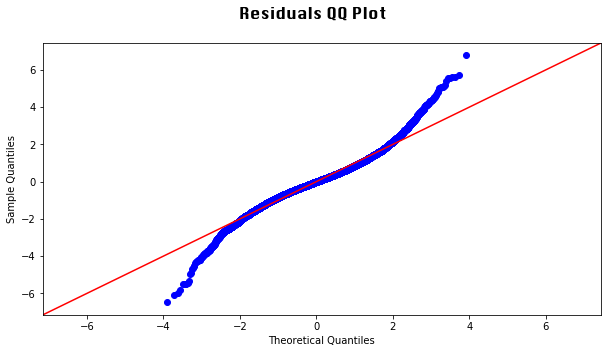

In [121]:
outcome = "price"

x_col =list(feat.iloc[:,1:])
sqft_living15 =  "sqft_living15"
sqft_living = "sqft_living"
x_col.remove(sqft_living15)
x_col.remove(sqft_living)
predictors = "+".join(x_col)
#formula ="price ~ bathrooms +sqft_living+sqft_living15+grade+sqft_above+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125"
formula = outcome +"~"+predictors     
Model_3 = smf.ols(formula=formula, data=feat).fit()
Model_3.summary()

residuals = Model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()
Model_3.summary()

In [122]:
#create test and training data subsets

X_train, X_test, y_train, y_test = train_test_split(feat, feat.price)
train, test = train_test_split(feat,test_size=.25,shuffle=True)

In [123]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [124]:
#look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15731, 75) (15731,) (5244, 75) (5244,)


In [125]:
#fit the data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
#use the model to predict y values for the test and train data
y_pred_train = Model_2.predict(X_train)
y_pred_test = Model_2.predict(X_test)

In [127]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2

train_r2 = r2_score(train['price'], Model_2.predict(train))
test_r2 = r2_score(test['price'], Model_2.predict(test))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print(f'R-Squared Train = {round(train_r2,2)}')
print(f'R-Squared Test = {round(test_r2,2)}')


Mean Squared Error Train: 2.2584799606784603e-10
Mean Squared Error Test: 2.0323736555490357e-09
R-Squared Train = 0.81
R-Squared Test = 0.81


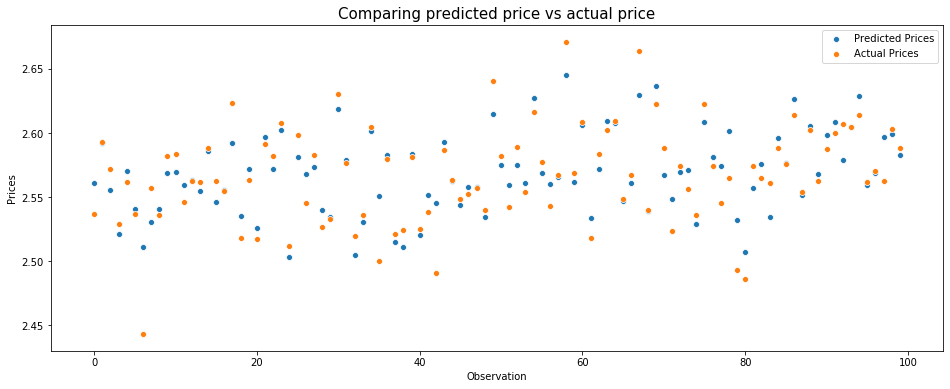

In [128]:
plt.figure(figsize=(16,6))
sns.scatterplot(range(len(y_pred_test[:100])), y_pred_test[:100], label='Predicted Prices')
sns.scatterplot(range(len(y_pred_test[:100])), y_test[:100], label='Actual Prices')
plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 15}), plt.xlabel('Observation'), plt.ylabel('Prices');

# CATEGORICAL_Model

In [344]:
## CATEGORICAL
df1 =df_outlier[['price', 'bathrooms', 'sqft_living', 'sqft_living15', 'grade',
       'sqft_above', 'condition', 'bedrooms']]
cat = pd.get_dummies(df1['condition'],prefix = "condition", drop_first=True) #drop a column to avoid dummy variable trap
df1 = df1.drop('condition',axis = 1)
df1 = df1.join(cat) 


cat = pd.get_dummies(df1['grade'],prefix = "grade", drop_first=True) #drop a column to avoid dummy variable trap
df1 = df1.drop('grade',axis = 1)
df1 = df1.join(cat) 


cat = pd.get_dummies(df1['bedrooms'], prefix = "bedrooms", drop_first=True) #drop a column to avoid dummy variable trap
df1 = df1.drop('bedrooms',axis = 1)
df1 = df1.join(cat)
df1

price  bathrooms  sqft_living  sqft_living15  sqft_above  \
0      12.309982       1.00         1180           1340        1180   
1      13.195614       2.25         2570           1690        2170   
2      12.100712       1.00          770           2720         770   
3      13.311329       3.00         1960           1360        1050   
4      13.142166       2.00         1680           1800        1680   
...          ...        ...          ...            ...         ...   
21592  12.793859       2.50         1530           1530        1530   
21593  12.899220       2.50         2310           1830        2310   
21594  12.904459       0.75         1020           1020        1020   
21595  12.899220       2.50         1600           1410        1600   
21596  12.691580       0.75         1020           1020        1020   

       condition_2  condition_3  condition_4  condition_5  grade_4  ...  \
0                0            1            0            0        0  ...   
1                0            1            0            0        0  ...   
2                0            1            0            0        0  ...   
3                0            0            0            1        0  ...   
4                0            1            0            0        0  ...   
...            ...          ...          ...          ...      ...  ...   
21592            0            1            0            0        0  ...   
21593            0            1            0            0        0  ...   
21594            0            1            0            0        0  ...   
21595            0            1            0            0        0  ...   
21596            0            1            0            0        0  ...   

       bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  bedrooms_7  bedrooms_8  \
0               1           0           0           0           0           0   
1               1           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           1           0           0           0           0   
4               1           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
21592           1           0           0           0           0           0   
21593           0           1           0           0           0           0   
21594           0           0           0           0           0           0   
21595           1           0           0           0           0           0   
21596           0           0           0           0           0           0   

       bedrooms_9  bedrooms_10  bedrooms_11  bedrooms_33  
0               0            0            0            0  
1               0            0            0            0  
2               0            0            0            0  
3               0            0            0            0  
4               0            0            0            0  
...           ...          ...          ...          ...  
21592           0            0            0            0  
21593           0            0            0            0  
21594           0            0            0            0  
21595           0            0            0            0  
21596           0            0            0            0  

[20975 rows x 29 columns]

In [345]:
#from statsmodels.formula.api import ols
outcome = "price"


predictors = "+".join(df1.iloc[:,1:])

formula = outcome +"~"+ predictors
model = ols(formula= formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     880.0
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:32:34   Log-Likelihood:                -6929.7
No. Observations:               20975   AIC:                         1.392e+04
Df Residuals:                   20946   BIC:                         1.415e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.9978      0.343     34.978      0.000      11.325      12.670
bathrooms         0.0038      0.005      0.743      0.457      -0.006       0.014
sqft_living       0.0003   7.16e-06     37.727      0.000       0.000       0.000
sqft_living15     0.0001   5.95e-06     17.898      0.000    9.48e-05       0.000
sqft_above       -0.0001    6.7e-06    -18.123      0.000      -0.000      -0.000
condition_2      -0.0842      0.068     -1.239      0.215      -0.217       0.049
condition_3       0.0424      0.063      0.671      0.502      -0.081       0.166
condition_4       0.1155      0.063      1.828      0.068      -0.008       0.239
condition_5       0.2554      0.064      4.016      0.000       0.131       0.380
grade_4          -0.1523      0.344     -0.443      0.657      -0.826       0.521
grade_5          -0.0278      0.338     -0.082      0.934      -0.691       0.635
grade_6           0.1703      0.338      0.504      0.614      -0.492       0.833
grade_7           0.3794      0.338      1.122      0.262      -0.283       1.042
grade_8           0.5777      0.338      1.709      0.088      -0.085       1.240
grade_9           0.7856      0.338      2.323      0.020       0.123       1.448
grade_10          0.9374      0.338      2.770      0.006       0.274       1.601
grade_11          1.1150      0.339      3.287      0.001       0.450       1.780
grade_12          1.2545      0.346      3.622      0.000       0.576       1.934
bedrooms_2        0.0109      0.026      0.426      0.670      -0.039       0.061
bedrooms_3       -0.1083      0.025     -4.251      0.000      -0.158      -0.058
bedrooms_4       -0.1262      0.026     -4.846      0.000      -0.177      -0.075
bedrooms_5       -0.1179      0.028     -4.268      0.000      -0.172      -0.064
bedrooms_6       -0.0907      0.034     -2.645      0.008      -0.158      -0.024
bedrooms_7       -0.0815      0.067     -1.211      0.226      -0.213       0.050
bedrooms_8       -0.0416      0.105     -0.395      0.693      -0.248       0.165
bedrooms_9        0.2865      0.171      1.676      0.094      -0.048       0.622
bedrooms_10       0.0266      0.197      0.135      0.892      -0.359       0.412
bedrooms_11       0.0604      0.338      0.178      0.858      -0.602       0.723
bedrooms_33       0.2770      0.338      0.819      0.413      -0.386       0.939
==============================================================================
Omnibus:                        9.546   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.571
Skew:                           0.050   Prob(JB):                      0.00835
Kurtosis:                       2.970   Cond. No.                     1.59e+06
================================================================

In [370]:
pvalues = pd.DataFrame(model.pvalues, columns=['p'])
features = list(pvalues[pvalues.p < 0.05].index)
features.remove('Intercept')
features

outcome = 'price'
#predictors = df_final.drop(['price'], axis=1)
pred_sum = "+".join(features)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1674.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:43:46   Log-Likelihood:                -8038.3
No. Observations:               20975   AIC:                         1.610e+04
Df Residuals:                   20962   BIC:                         1.621e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.2327      0.010   1173.799      0.000      12.212      12.253
sqft_living       0.0003   6.89e-06     49.529      0.000       0.000       0.000
sqft_living15     0.0001   6.15e-06     24.090      0.000       0.000       0.000
sqft_above    -9.973e-05    6.9e-06    -14.461      0.000      -0.000   -8.62e-05
condition_5       0.1628      0.009     17.786      0.000       0.145       0.181
grade_9           0.2325      0.009     25.614      0.000       0.215       0.250
grade_10          0.3240      0.014     22.989      0.000       0.296       0.352
grade_11          0.4479      0.028     16.048      0.000       0.393       0.503
grade_12          0.5111      0.079      6.492      0.000       0.357       0.665
bedrooms_3       -0.0701      0.008     -8.997      0.000      -0.085      -0.055
bedrooms_4       -0.1051      0.009    -11.316      0.000      -0.123      -0.087
bedrooms_5       -0.1225      0.013     -9.310      0.000      -0.148      -0.097
bedrooms_6       -0.1147      0.025     -4.597      0.000      -0.164      -0.066
==============================================================================
Omnibus:                       27.398   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.450
Skew:                          -0.016   Prob(JB):                     8.09e-06
Kurtosis:                       2.839   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""